# Homework5
## Preliminar Functions and Libraries


In [1]:
from ACFEBlackScholesFramework import ComputeOptionBSE
from ACFEUtilities import *

## Question 1

In [2]:
resultQ1 = NewtonBS(x0 = 0.5, tol=10**-6, final_value = 2.5, 
         S=30, K=30, T=1/2, r=0.03, q=0.01, optionType="Call")
print(f"The implied volatility for question1 using Newton is: {round(resultQ1,6)}")

The implied volatility for question1 using Newton is: 0.280755


## Question 2
## Part (i)
### a. Bisection

In [3]:
resultQ2_i_Bisection = BisectionBS(a=0.0001, b=1, tol_int=10**-6, tol_approx=10**-9, final_value = 2.75, 
         S=40, K=40, T=5/12, r=0.025, q=0.01, optionType="Call")
print(f"The implied volatility for question2 using Bisection is: {round(resultQ2_i_Bisection,10)}")

The implied volatility for question2 using Bisection is: 0.2569027418


### b. Newton

In [4]:
resultQ2_i_Newton = NewtonBS(x0 = 0.5, tol=10**-6, final_value = 2.75, 
         S=40, K=40, T=5/12, r=0.025, q=0.01, optionType="Call")
print(f"The implied volatility for question2 using Newton is: {round(resultQ2_i_Newton,10)}")

The implied volatility for question2 using Newton is: 0.2569027378


### c. Secant

In [5]:
resultQ2_i_Secant = SecantBS(x_1=0.49, x0=0.5, tol_approx=10**-9, tol_consec=10**-6, final_value=2.75,
                            S=40, K=40, T=5/12, r=0.025, q=0.01, optionType="Call")
print(f"The implied volatility for question2 using Secant is: {round(resultQ2_i_Secant,10)}")

The implied volatility for question2 using Secant is: 0.2569027418


## Part(ii)

In [6]:
# Implied volatility using Newton:
sigma_implied = resultQ2_i_Newton
# Approx implied volatility: 
t_term_numer = (0.025 - 0.01) * (5/12) / 2
t_term_denom = (0.025 + 0.01) * (5/12) / 2
sigma_approx = (np.sqrt(2 * np.pi) / (40 * np.sqrt(5/12)) ) * (2.75 - (t_term_numer * 40)) / (1- t_term_denom)
print(f"Approximation of sigma = {round(sigma_approx, 12)}")
# computing relative error
relativeError = abs(sigma_approx - sigma_implied) / sigma_implied
print(f"Relative Error: {round(relativeError, 12)}")

Approximation of sigma = 0.256710246571
Relative Error: 0.000749276675


## Question 3

In [7]:
bond_yield = BondYieldNewton(B=101,
                        t_cash_flow=[6/12, 12/12, 18/12, 24/12, 30/12, 36/12],
                        v_cash_flow=[2, 2, 2, 2, 2, 102],
                        tol=10**-6)

print(f"Bond Yield: {round(bond_yield, 12)}")
bondResult = BondPricing(t_cash_flow=[6/12, 12/12, 18/12, 24/12, 30/12, 36/12],
                            v_cash_flow=[2, 2, 2, 2, 2, 102],
                            y=bond_yield)
print(f"Bond Duration: {round(bondResult[1], 12)}")
print(f"Bond Convexity: {round(bondResult[2], 12)}")

Bond Yield: 0.036122652764
Bond Duration: 2.857578002972
Bond Convexity: 8.40856234339


## Question 4
### Part (i)

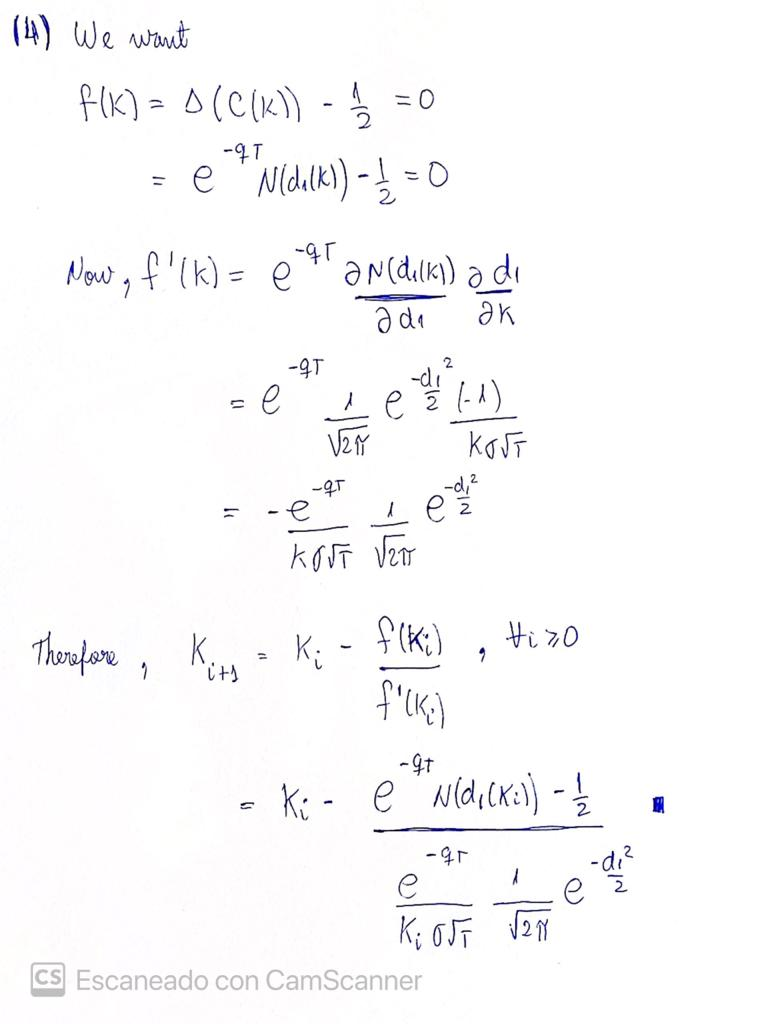

## Part(ii)

In [8]:
resultQ4 = NewtonDelta(x0=30, tol_approx=10**-6, tol_consec=10**-6, final_value=0.5,
                            S=30, T=3/12, sigma=0.3,r=0.025, q=0.01, optionType="Call")
print(f"The result for Delta using Newton is: {round(resultQ4, 12)}")

The result for Delta using Newton is: 30.439064600067


## Question 5

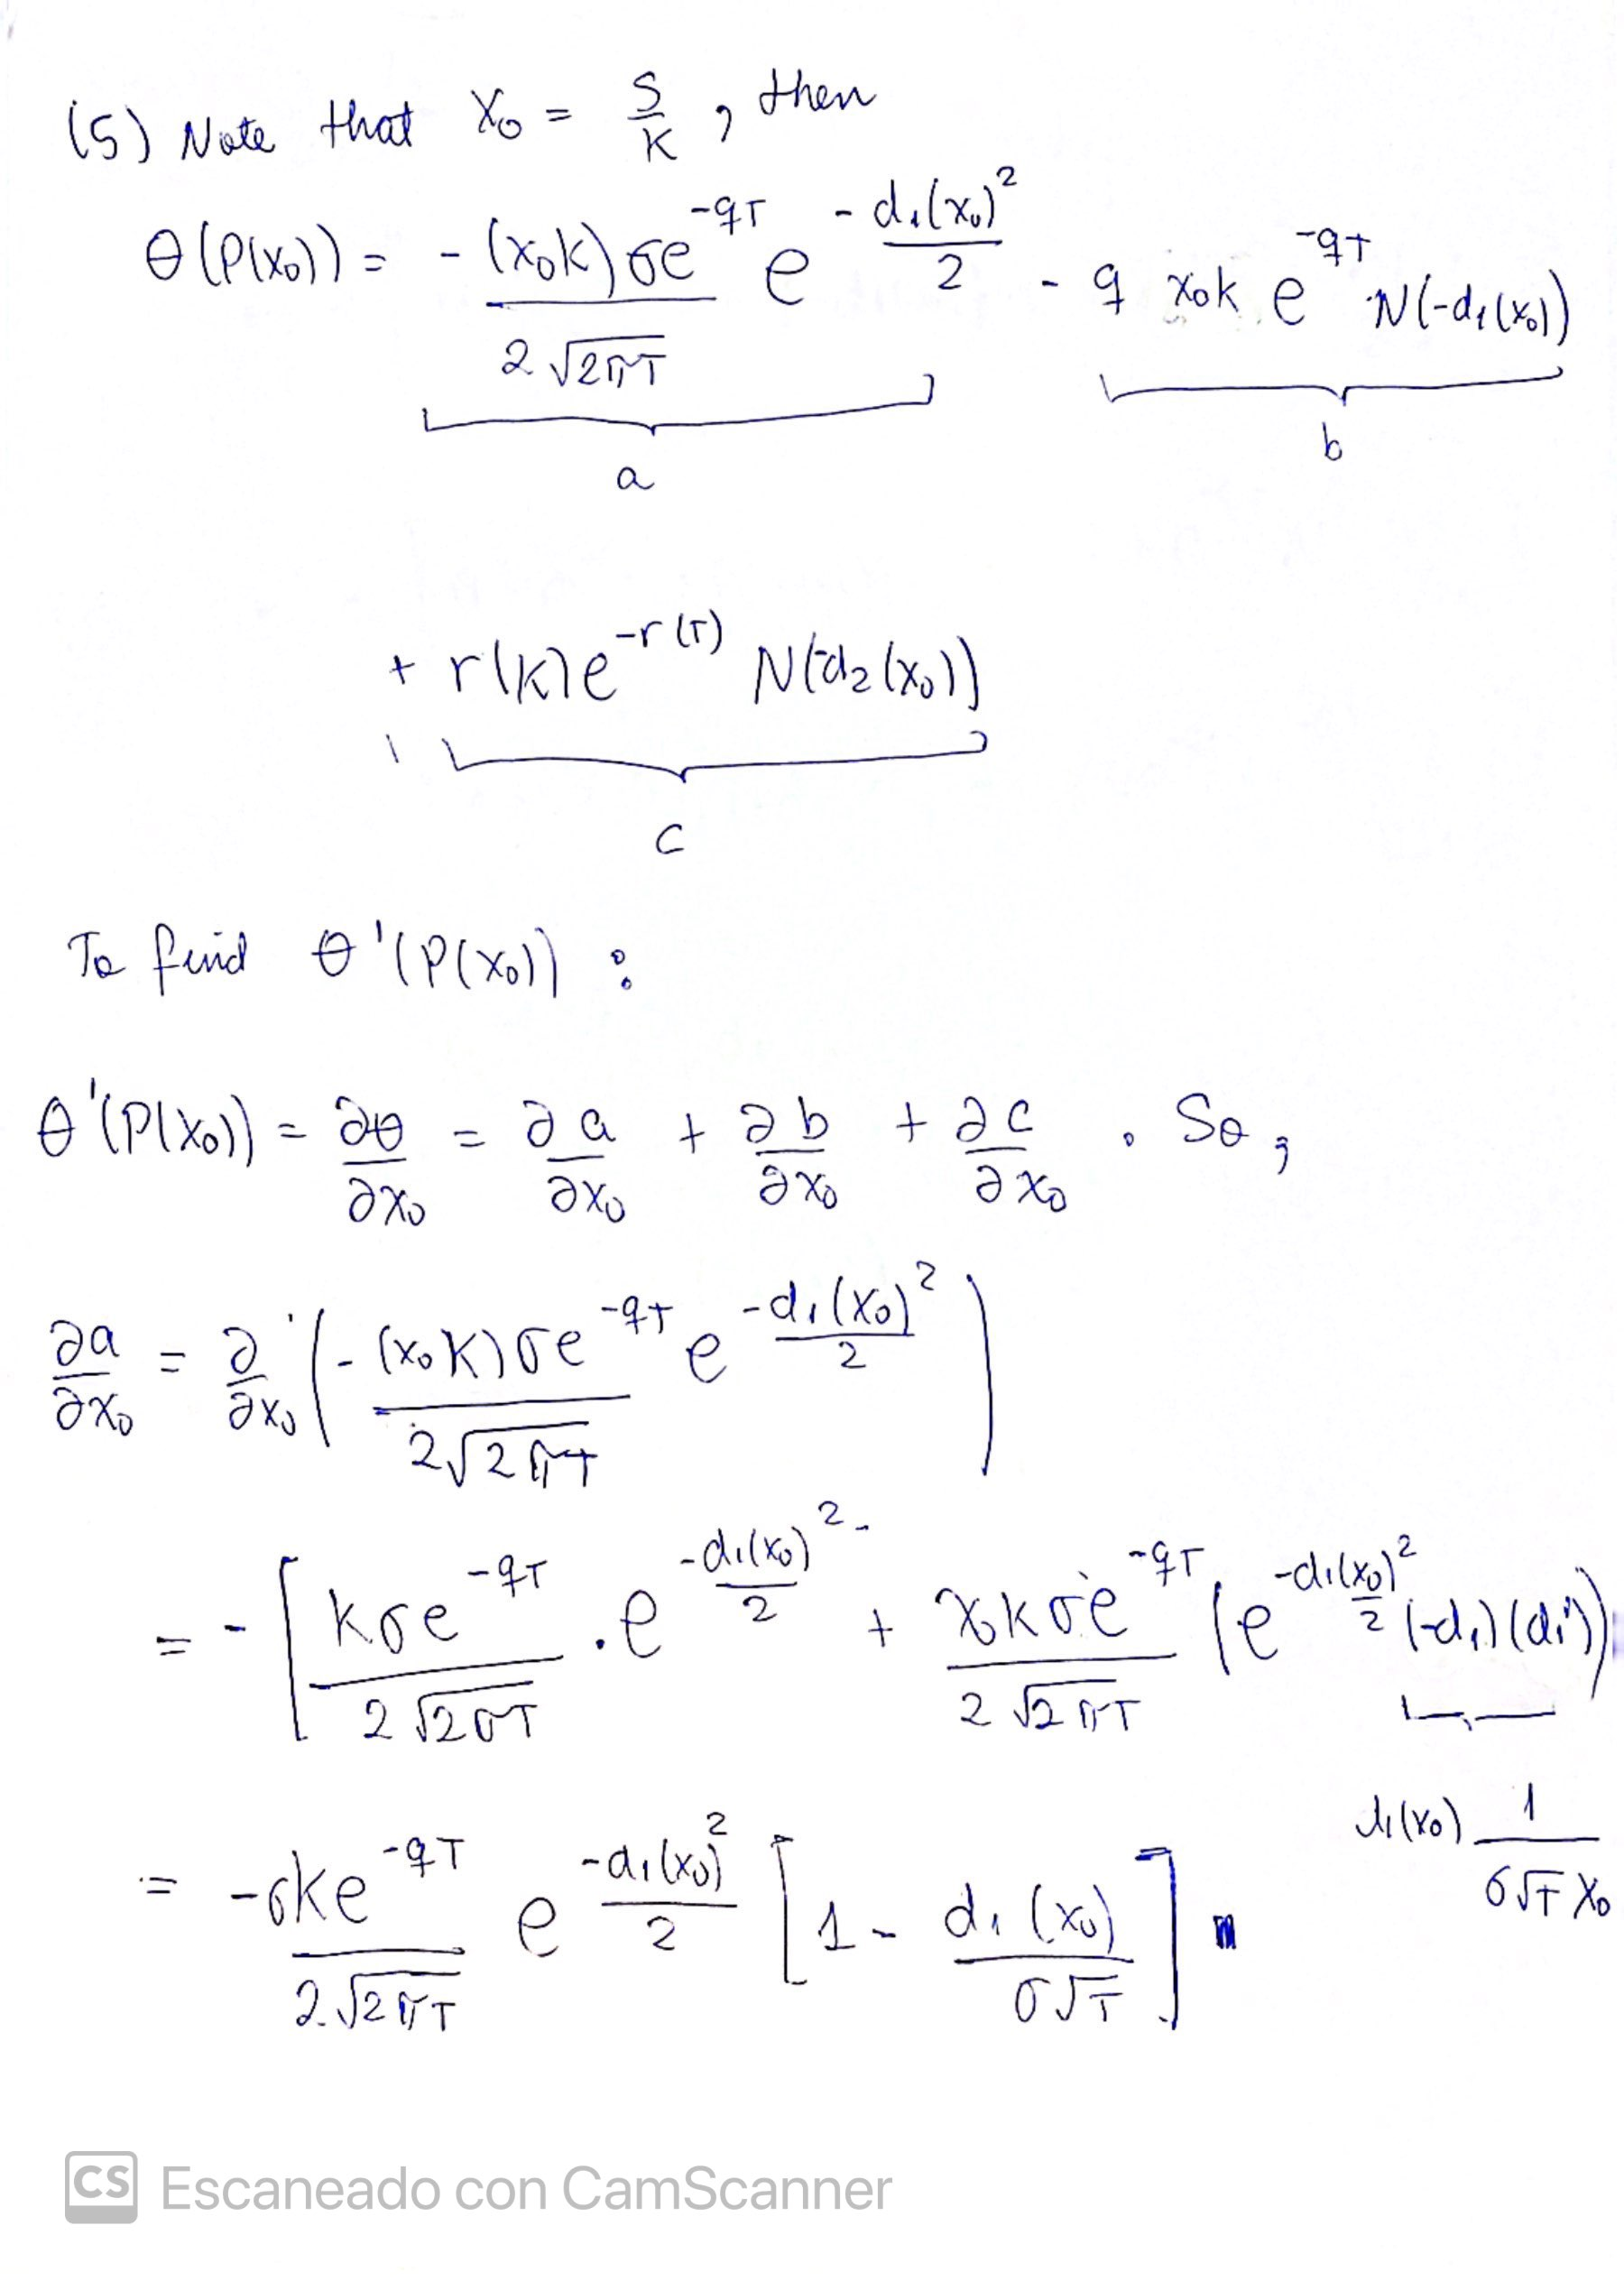

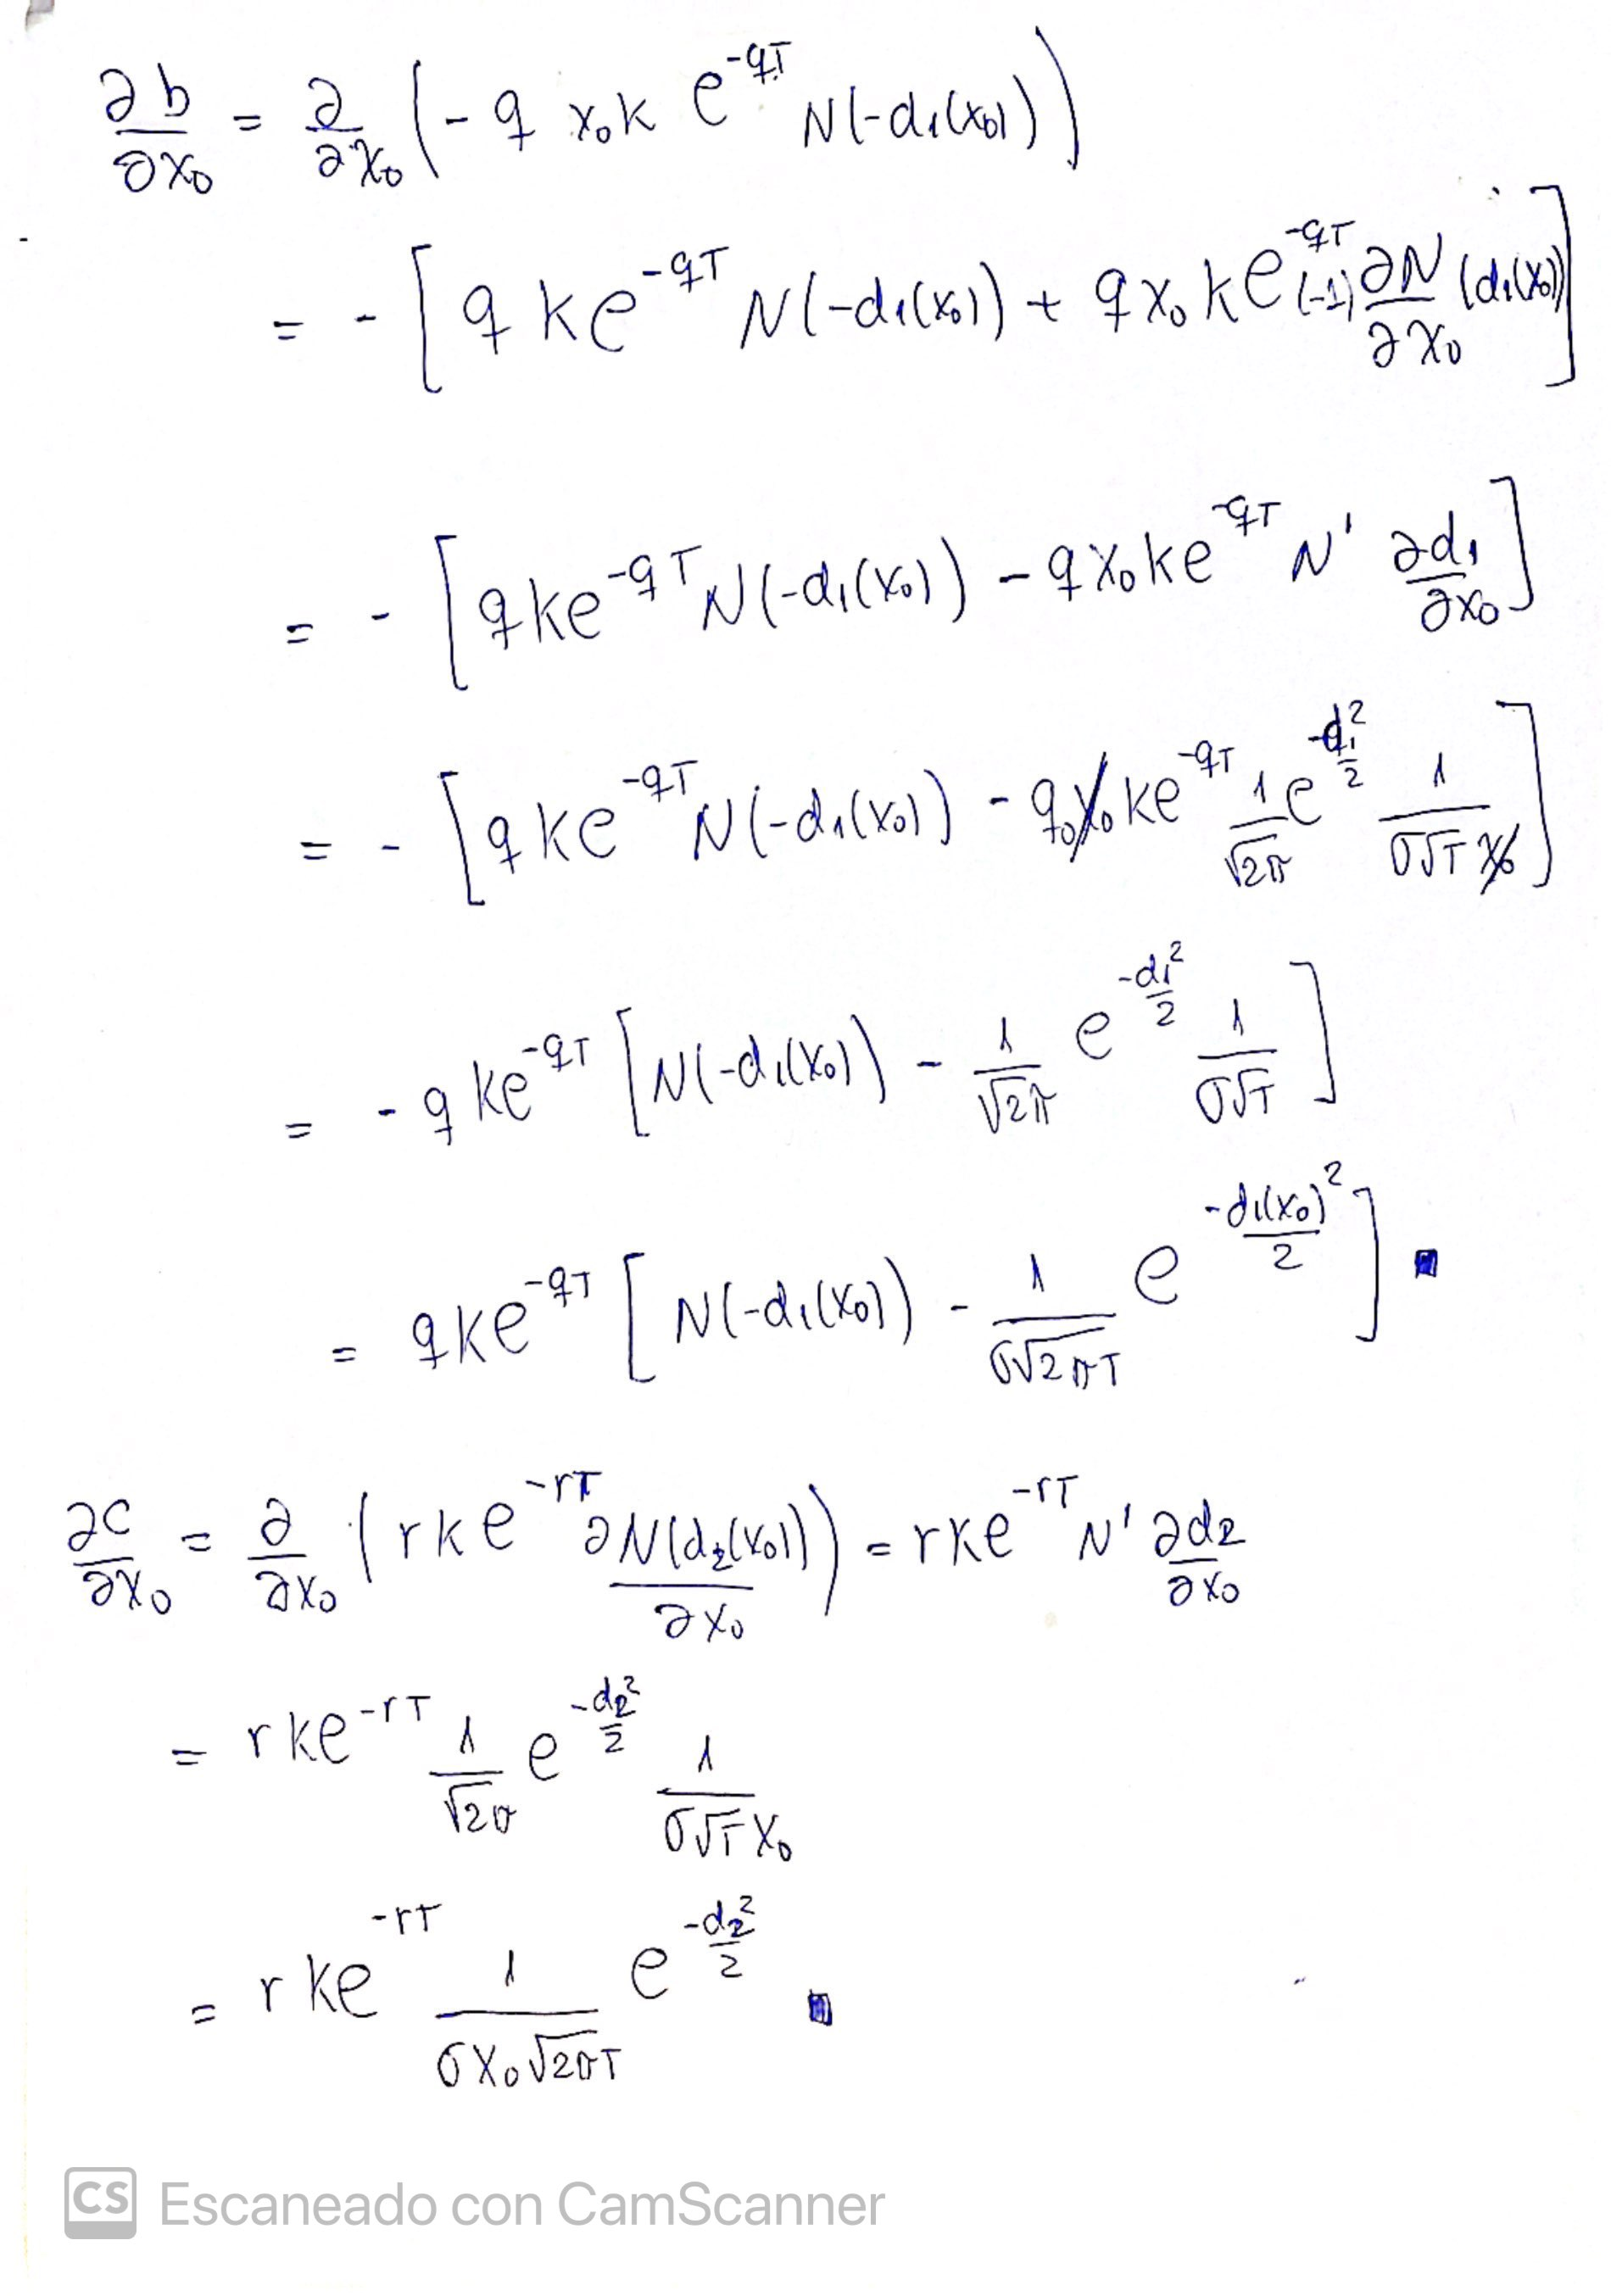

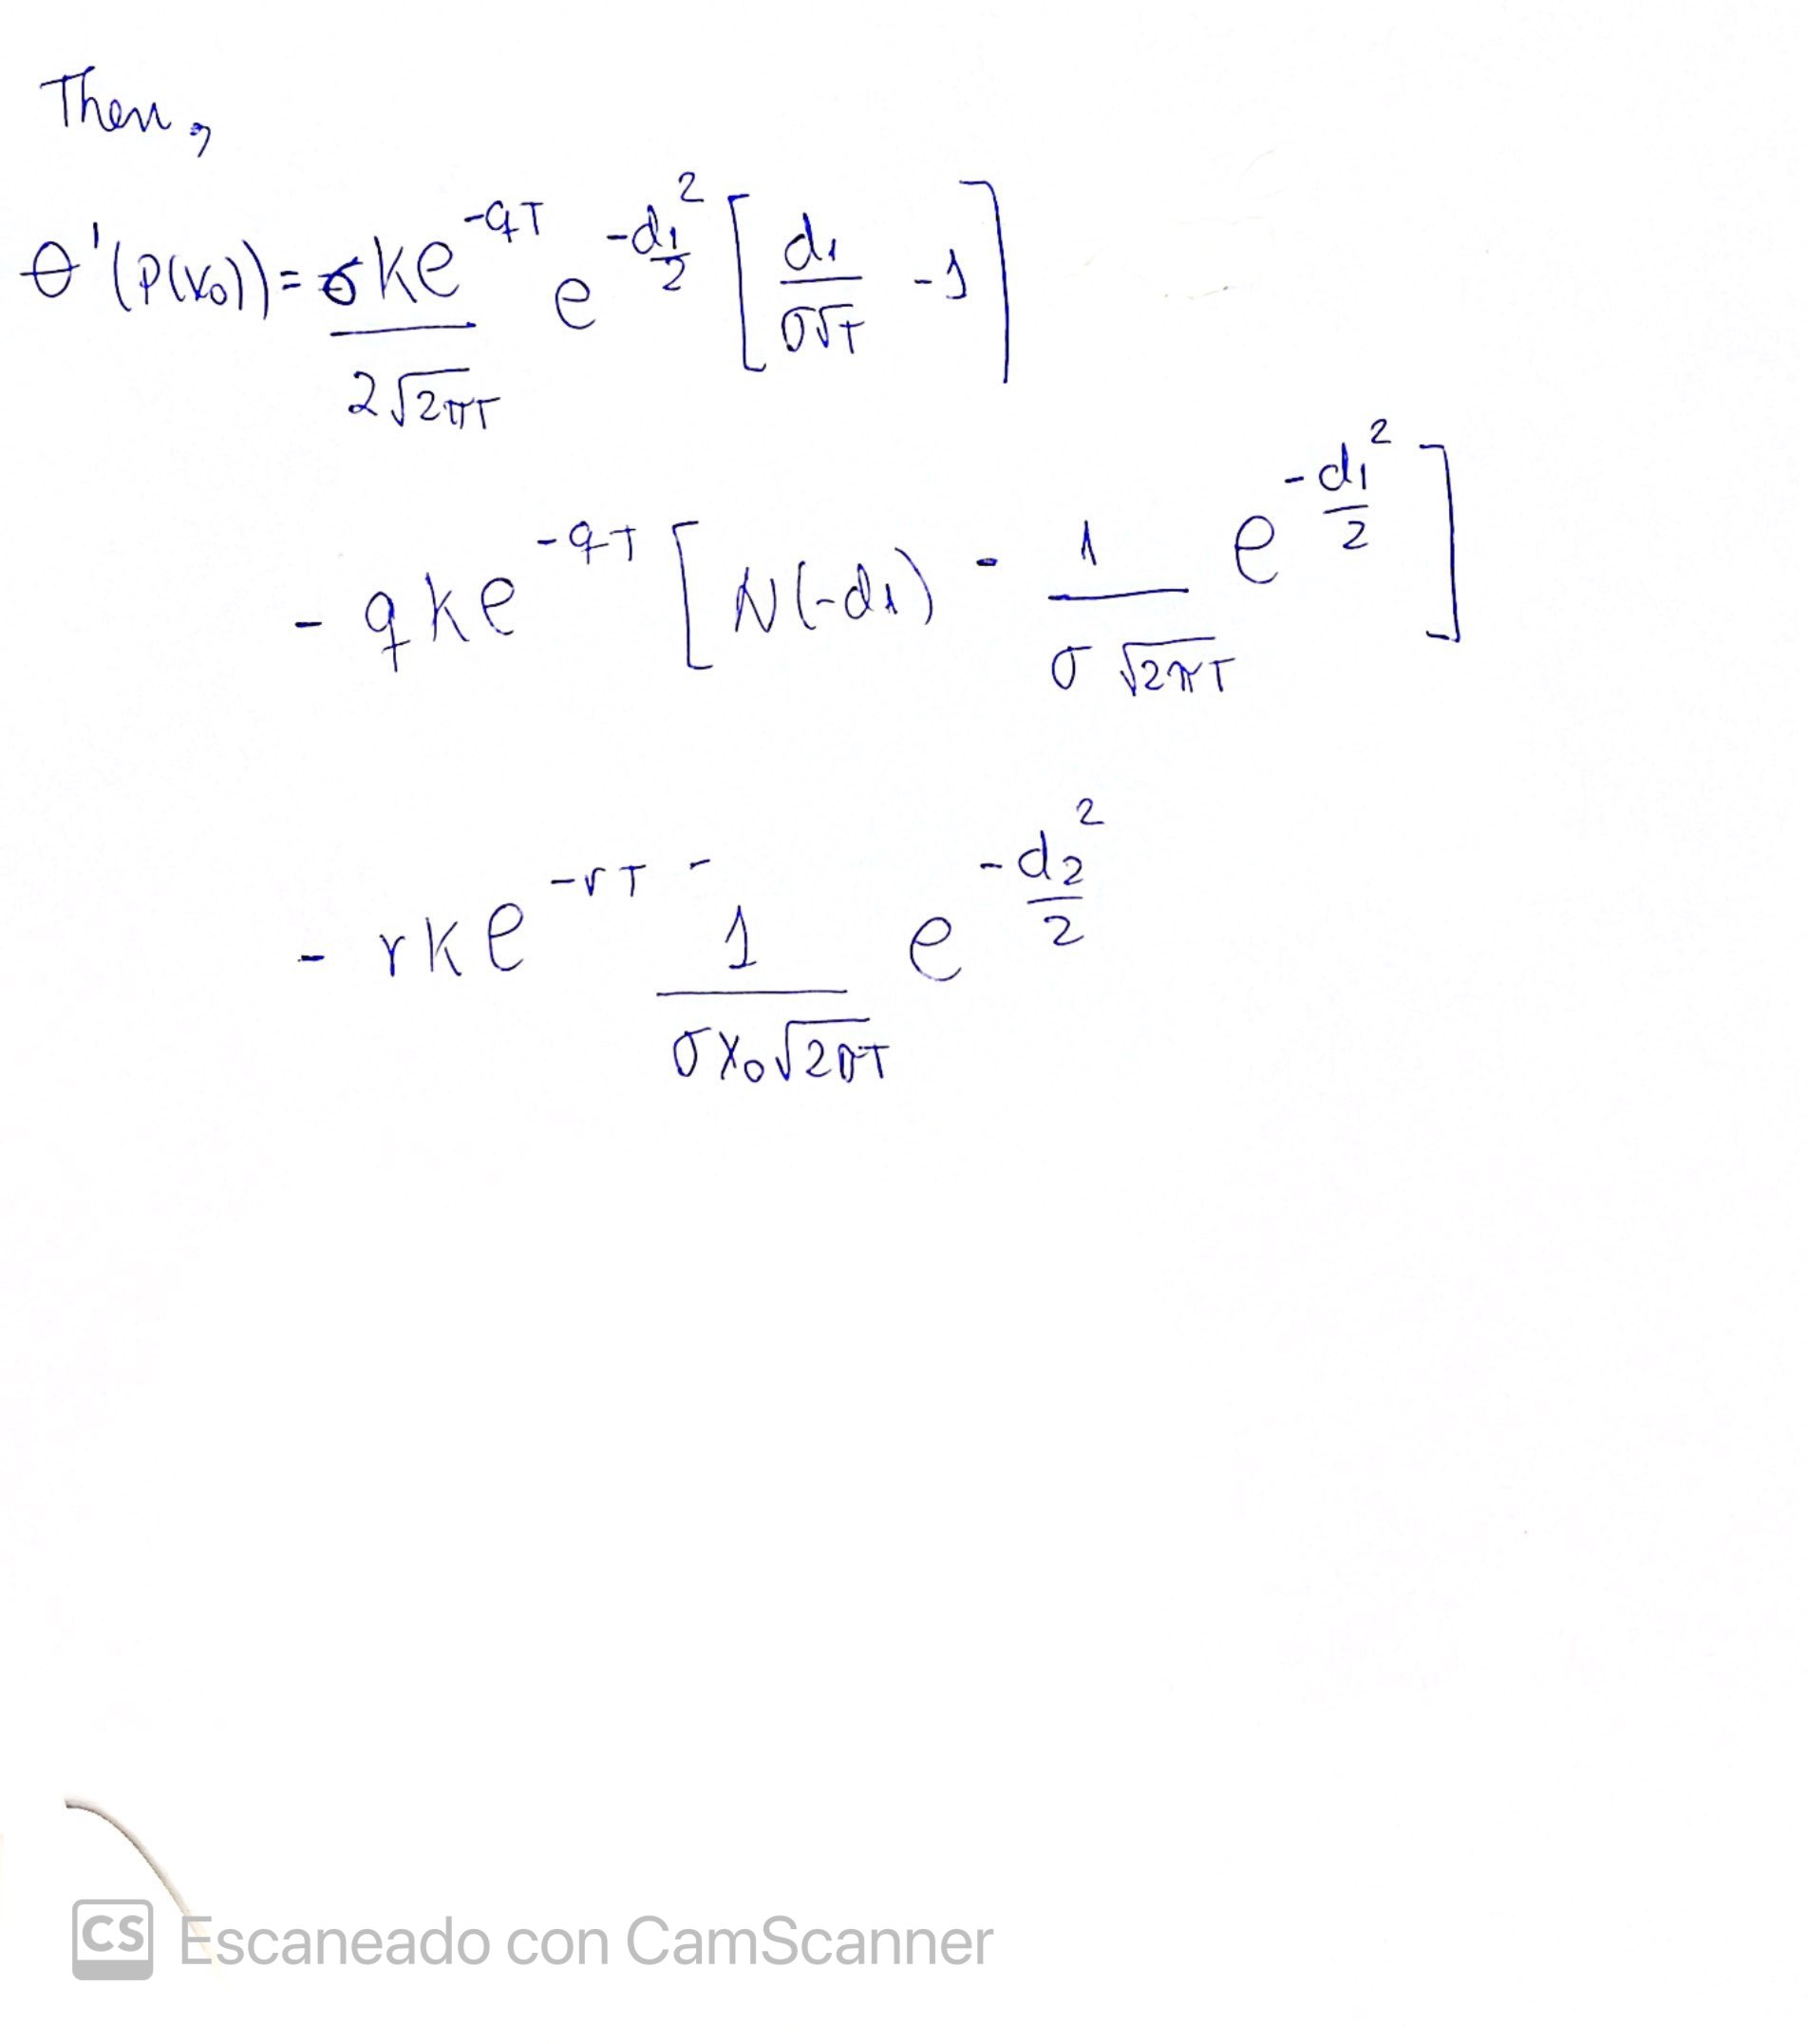

In [9]:
# using newton method to find the largest S/K = x0 in a theta of a put such as theta >=0 
resultQ5 = NewtonThetaPut(x0=0.9, tolerance=10**-6, tolapprox = 10**-9, printx=False,
                          K=100, dT=0.5, q=0, r=0.03, sigma=0.3, method_cdf='stefanica')
print(f"The result of Theta for a Put using Newton is: {round(resultQ5,12)}")

The result of Theta for a Put using Newton is: 0.734724240786


## Question 6

In [10]:
# We create the data bond
dataBond = pd.DataFrame(
 {
 'Maturity': [0.5, 1, 3, 5],
 'Coupon Rate' : [0, 5, 5, 6],
 'Price': [97.5, 100, 102, 104]
 }
)

resultsQ6 = bootstrap_base(bond_timeframe=0.5, x0=0.05, data=dataBond,
                           face_value=100, tol_consec=10**-6, tol_approx=10**-9, overnight_rate=0.05,
                           printx=False, counter_newton=True)
# zero rate table
table_zerorate = \
pd.DataFrame([resultsQ6[0]]).T.rename_axis('t').reset_index().rename({0:'r(0,t)'}, axis=1)
print(table_zerorate)

# We print the total number of iterations and the approximated values at each one
print(f"\nTotal iterations at T = 3: {resultsQ6[1]['3.0'][0]}")
print(f"Approximated values at each iteration: \n{resultsQ6[1]['3.0'][1]}")



      t              r(0,t)
0   0.0                0.05
1   0.5  0.0506356159685797
2   1.0  0.0493696003028120
3   1.5  0.0475566011774543
4   2.0  0.0457436020520967
5   2.5  0.0439306029267390
6   3.0            0.042118
7   3.5            0.044295
8   4.0            0.046472
9   4.5            0.048649
10  5.0            0.050826

Total iterations at T = 3: 3
Approximated values at each iteration: 
[0.04202499124118261, 0.042117591115291134, 0.0421176038013814]


## Question 7

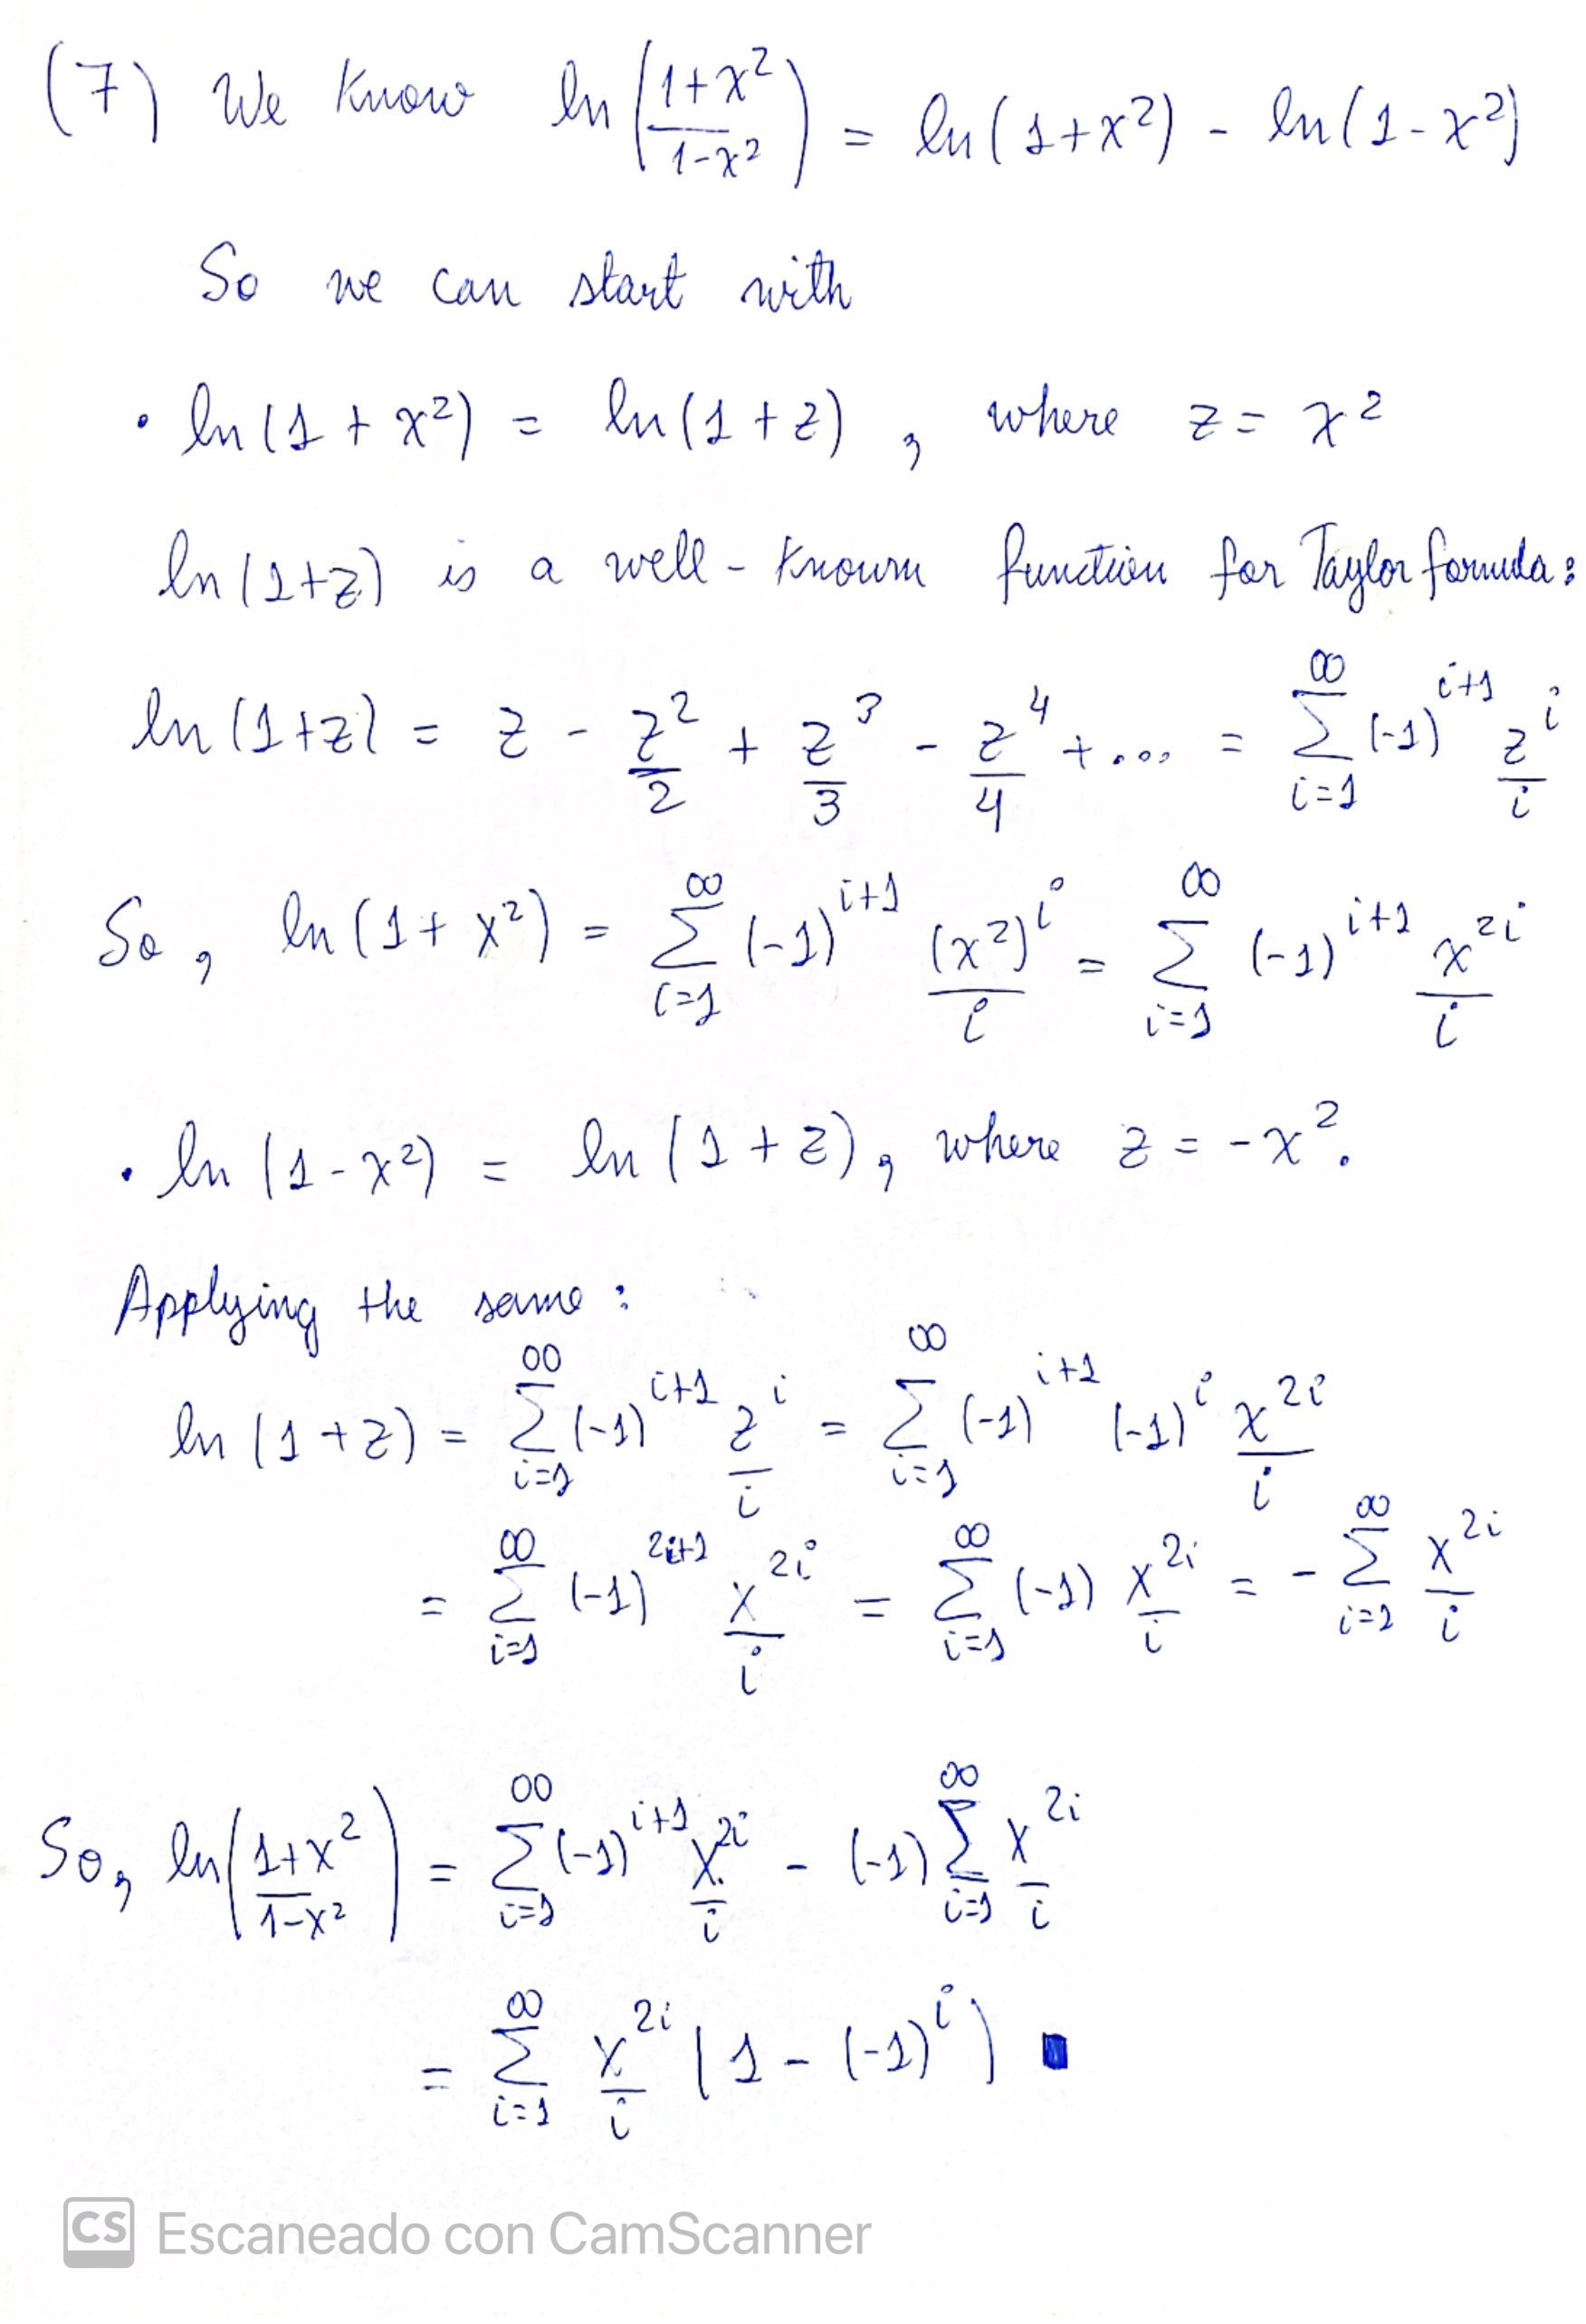

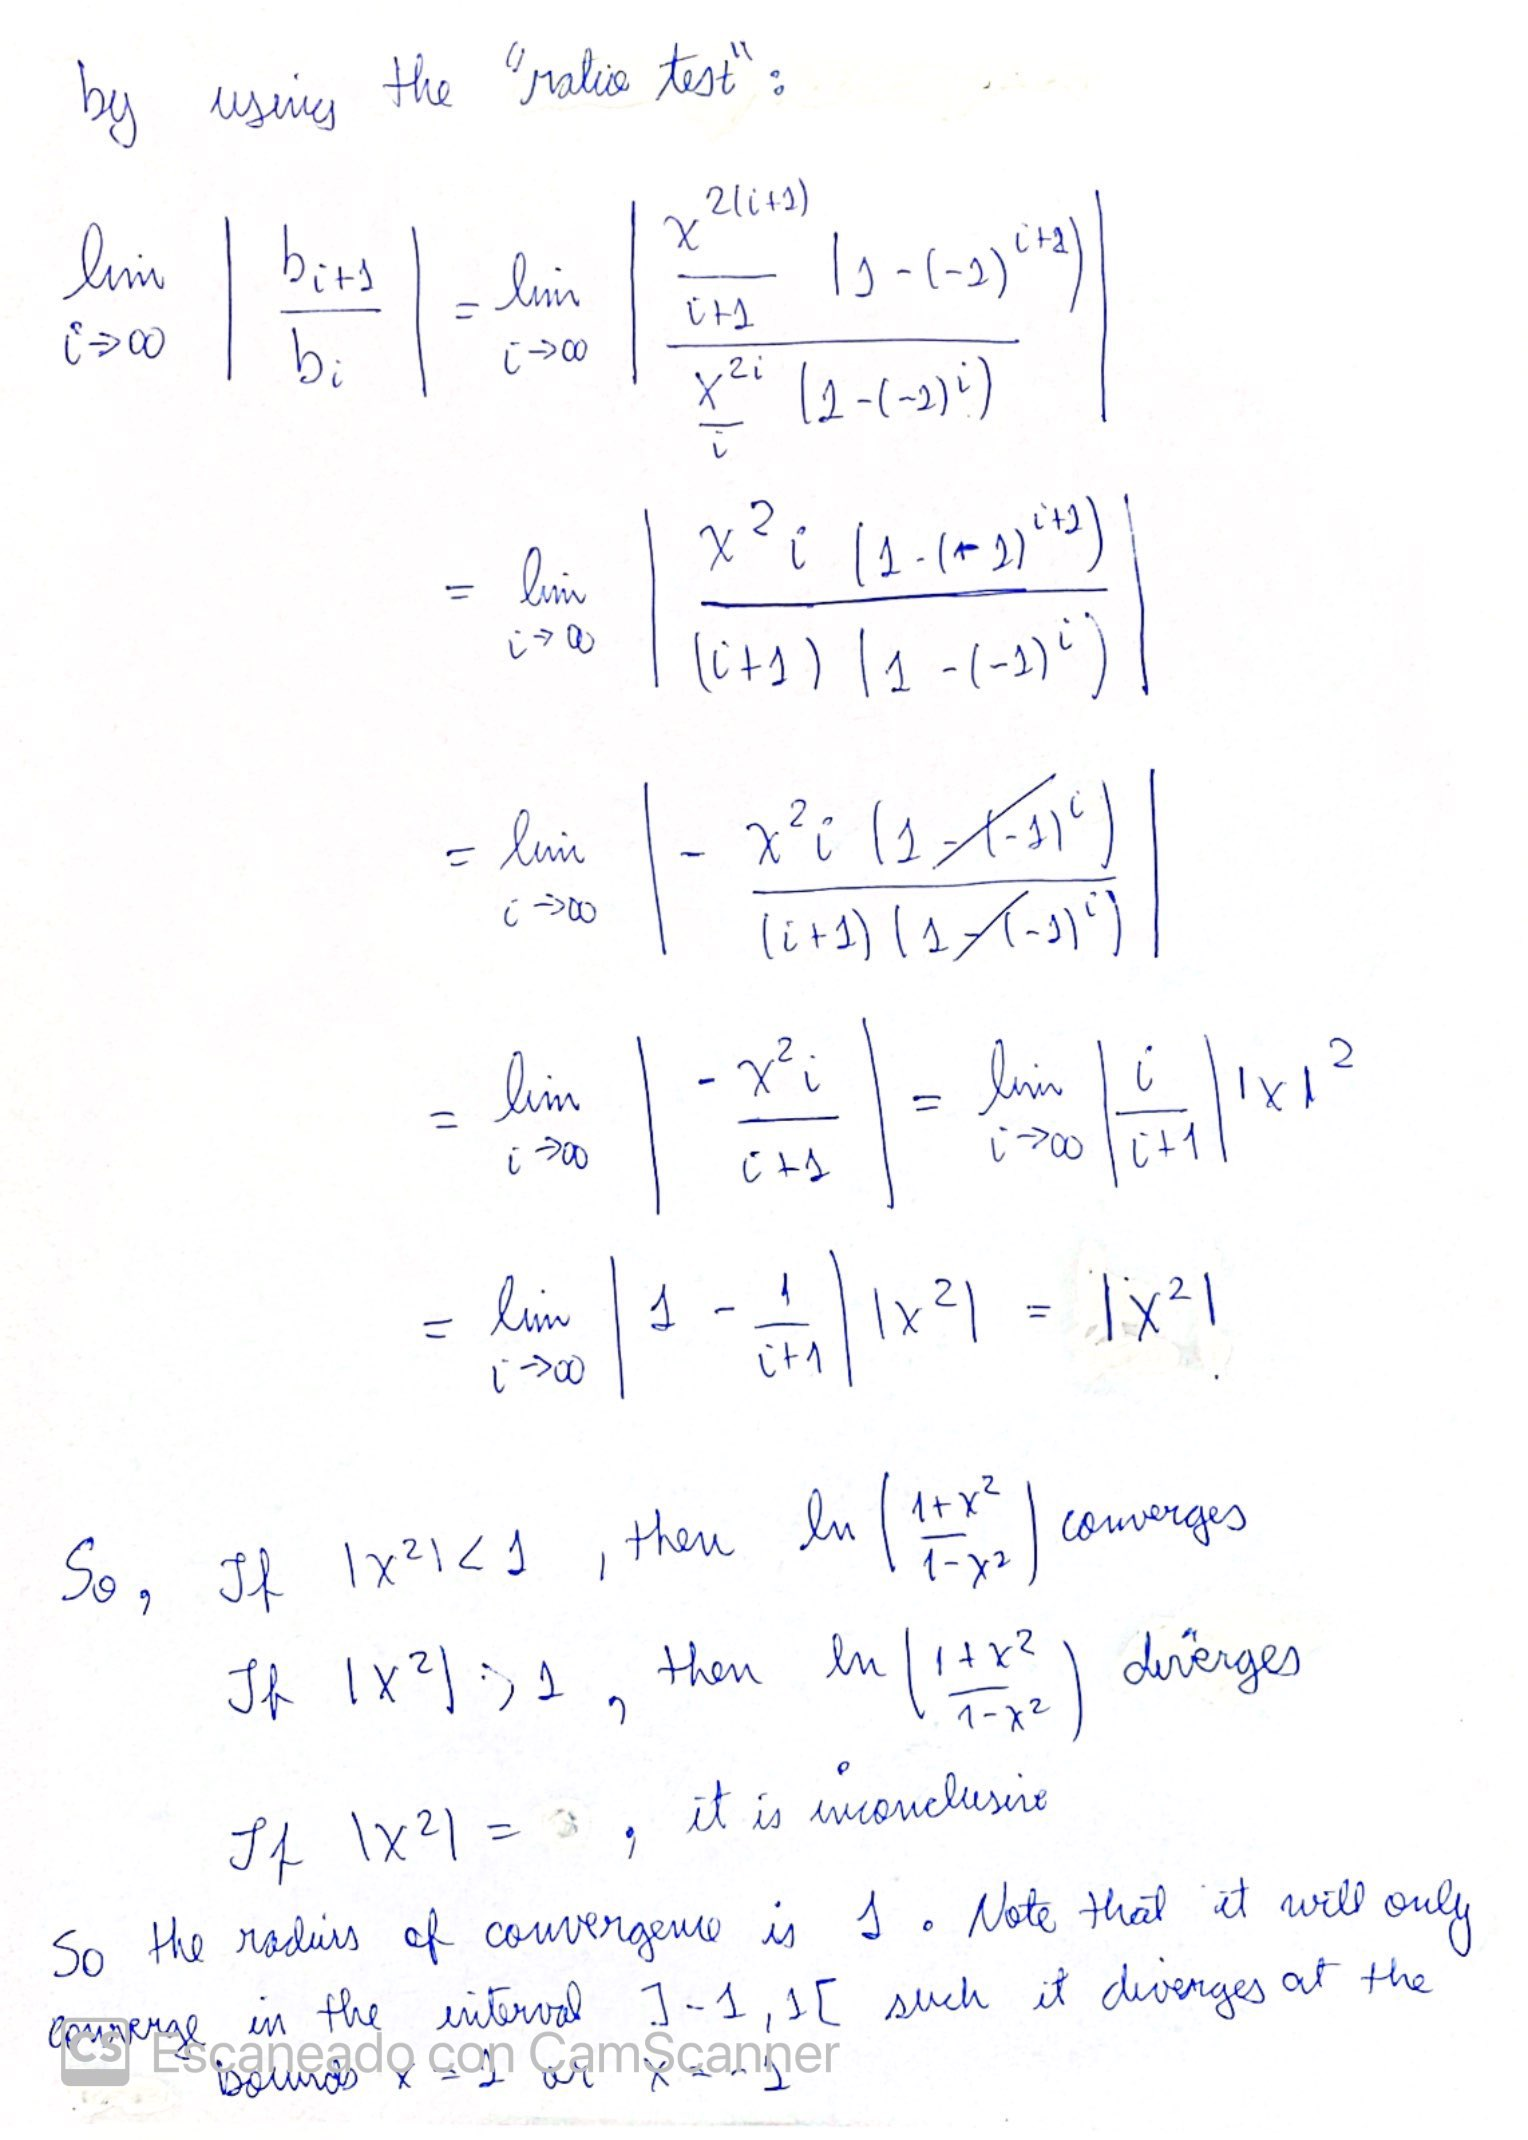

## Question 8

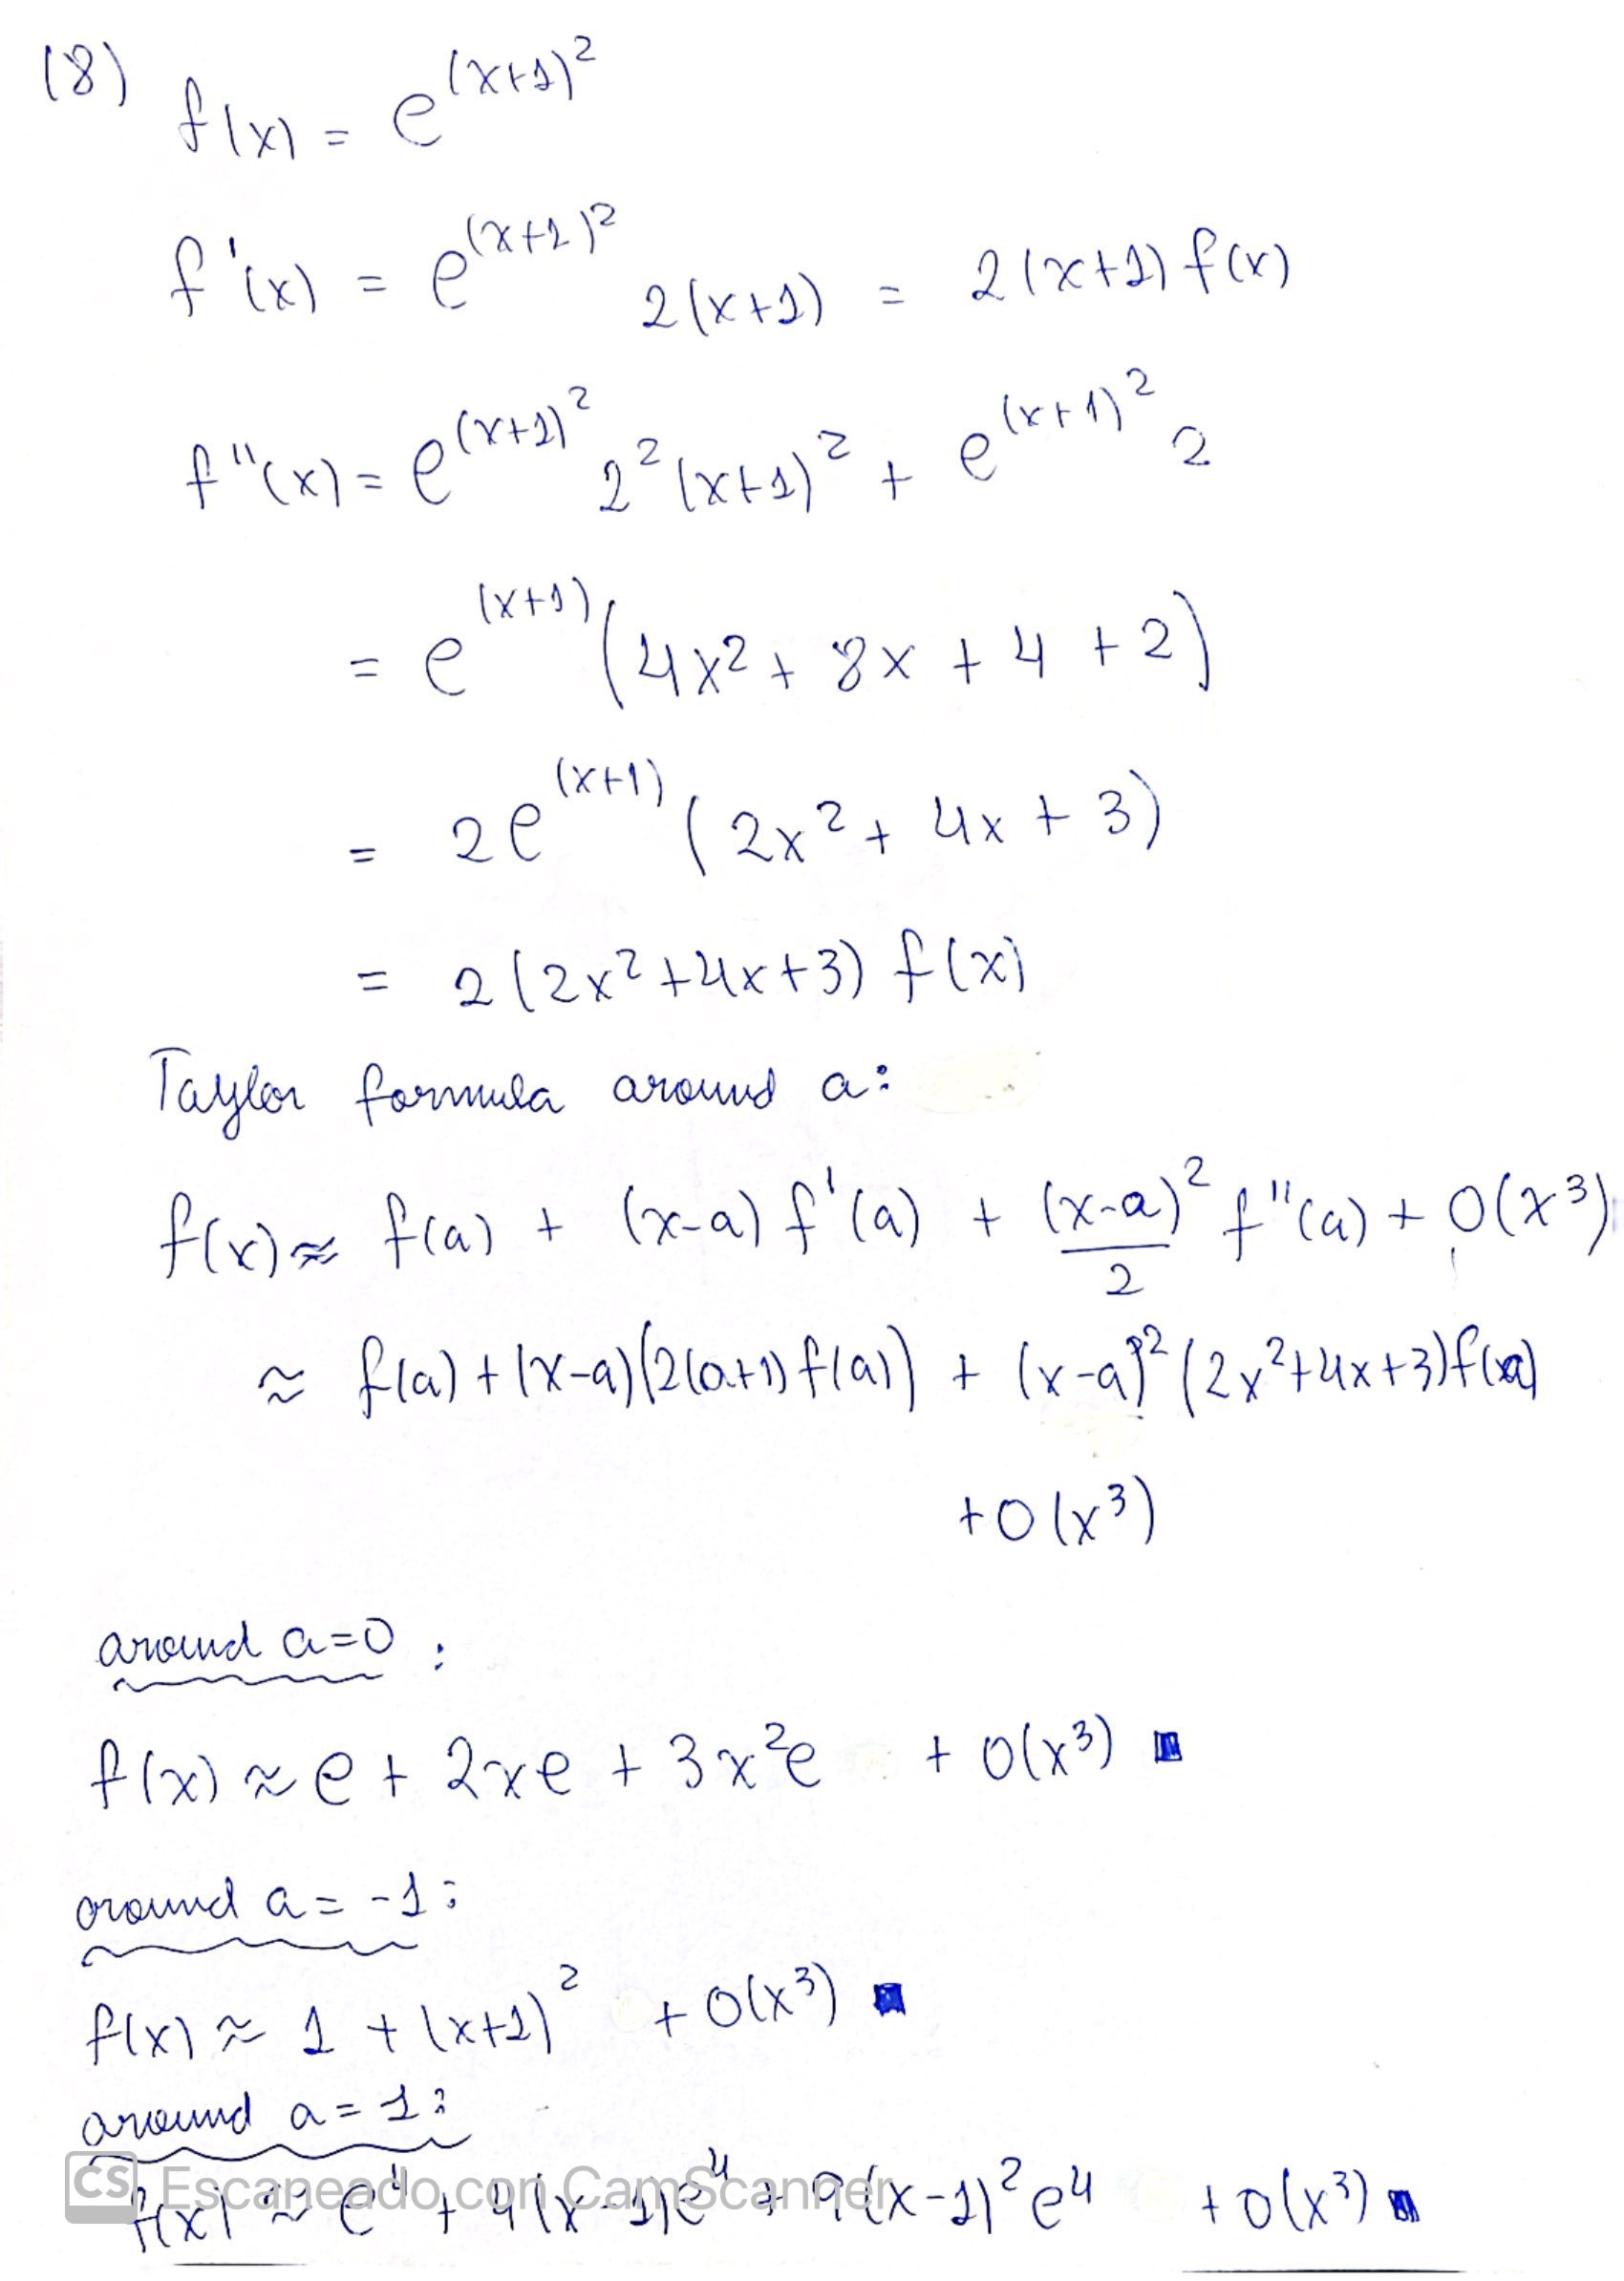

## Question 9
### Part(i)

In [11]:
# assuming face value of 100
bondResult = BondPricing(t_cash_flow=[3/12, 6/12, 9/12, 12/12, 15/12, 18/12, 21/12, 24/12],
                            v_cash_flow=[2, 2, 2, 2, 2, 2, 2, 102],
                            y=0.09)
print(f"Bond Price, Duration and Convexity are: {bondResult}, respectively")

Bond Price, Duration and Convexity are: [98.00555695858719, 1.8663743751545907, 3.634758730097192], respectively


### Part(ii)
We have the following:
$Bnew,D = B(1 − DΔy)$ and $Bnew,C = B(1 − DΔy + (Δy)2)$

Where and are the new price from the change in without and with a convexity adjustment
respectively.
Therefore the approximated price of the bond when increases is

In [12]:
fvalueQ9 = 100
vector_cashflowsQ9 = [2, 2, 2, 2, 2, 2, 2, 102]
vector_t_cashflowsQ9 = [3/12, 6/12, 9/12, 12/12, 15/12, 18/12, 21/12, 24/12]
yieldB_Q9 = 0.09
priceBondQ9 = bondResult[0]
DurationQ9 = bondResult[1]
ConvexityQ9 = bondResult[2]
# define vector of yield increments
deltaYields = [oneBps * 10, oneBps * 50, oneBps * 100, oneBps * 200, oneBps * 400]
# new bond prices with and without convexity adj., and the new actual price
bnewD_values = []
bnewC_values = []
bnew_actual_values = []
# iteration by delta y
for deltaY in deltaYields:
    bnewD_values.append(
        bondYieldAdj_NoConvex(
            priceBond = priceBondQ9,
            durationBond = DurationQ9,
            changeYield=deltaY
        )
    )
     # compute and save BnewC
    bnewC_values.append(
     bondYieldAdj_IncConvex(
         priceBond = priceBondQ9,
         durationBond = DurationQ9,
         convexityBond = ConvexityQ9,
         changeYield=deltaY
     )
 ) 
     # computing the new actual price B(y + delta y)
    bnew_actual_values.append(
     bond_formula(
         t_cash_flows = vector_t_cashflowsQ9,
         v_cash_flows = vector_cashflowsQ9,
         y = yieldB_Q9 + deltaY
     ) 
 )

In [13]:
print(f" The result for Question 9.ii: Filling the chart to report the final results:")
bondPriceYieldAdj = pd.DataFrame(
 {
 "Bnew,D" : bnewD_values,
 "Bnew,C": bnewC_values,
 "B(y+Δy)": bnew_actual_values
 }
)
bondPriceYieldAdj


 The result for Question 9.ii: Filling the chart to report the final results:


Bnew,D     Bnew,C    B(y+Δy)
0  97.822642  97.822820  97.822820
1  97.090982  97.095434  97.095420
2  96.176406  96.194218  96.194101
3  94.347256  94.418501  94.417573
4  90.688955  90.973936  90.966583

### Part(iii)

In [14]:
relativeApproxErrorD = \
abs(bondPriceYieldAdj["Bnew,D"] - bondPriceYieldAdj["B(y+Δy)"])/bondPriceYieldAdj["B(y+Δy)"]
relativeApproxErrorC = \
abs(bondPriceYieldAdj["Bnew,C"] - bondPriceYieldAdj["B(y+Δy)"])/bondPriceYieldAdj["B(y+Δy)"]
print(f"Compute a chart to get the approximation errors:")
df_relativeApproxError = pd.DataFrame(
 {
 "Approximatino error of Bnew,D" : relativeApproxErrorD,
 "Approximatino error of Bnew,C": relativeApproxErrorC,
 }
)
df_relativeApproxError


Compute a chart to get the approximation errors:


Approximatino error of Bnew,D  Approximatino error of Bnew,C
0                       0.000002                   1.197170e-09
1                       0.000046                   1.504687e-07
2                       0.000184                   1.212025e-06
3                       0.000745                   9.829978e-06
4                       0.003052                   8.082455e-05

## Question 10

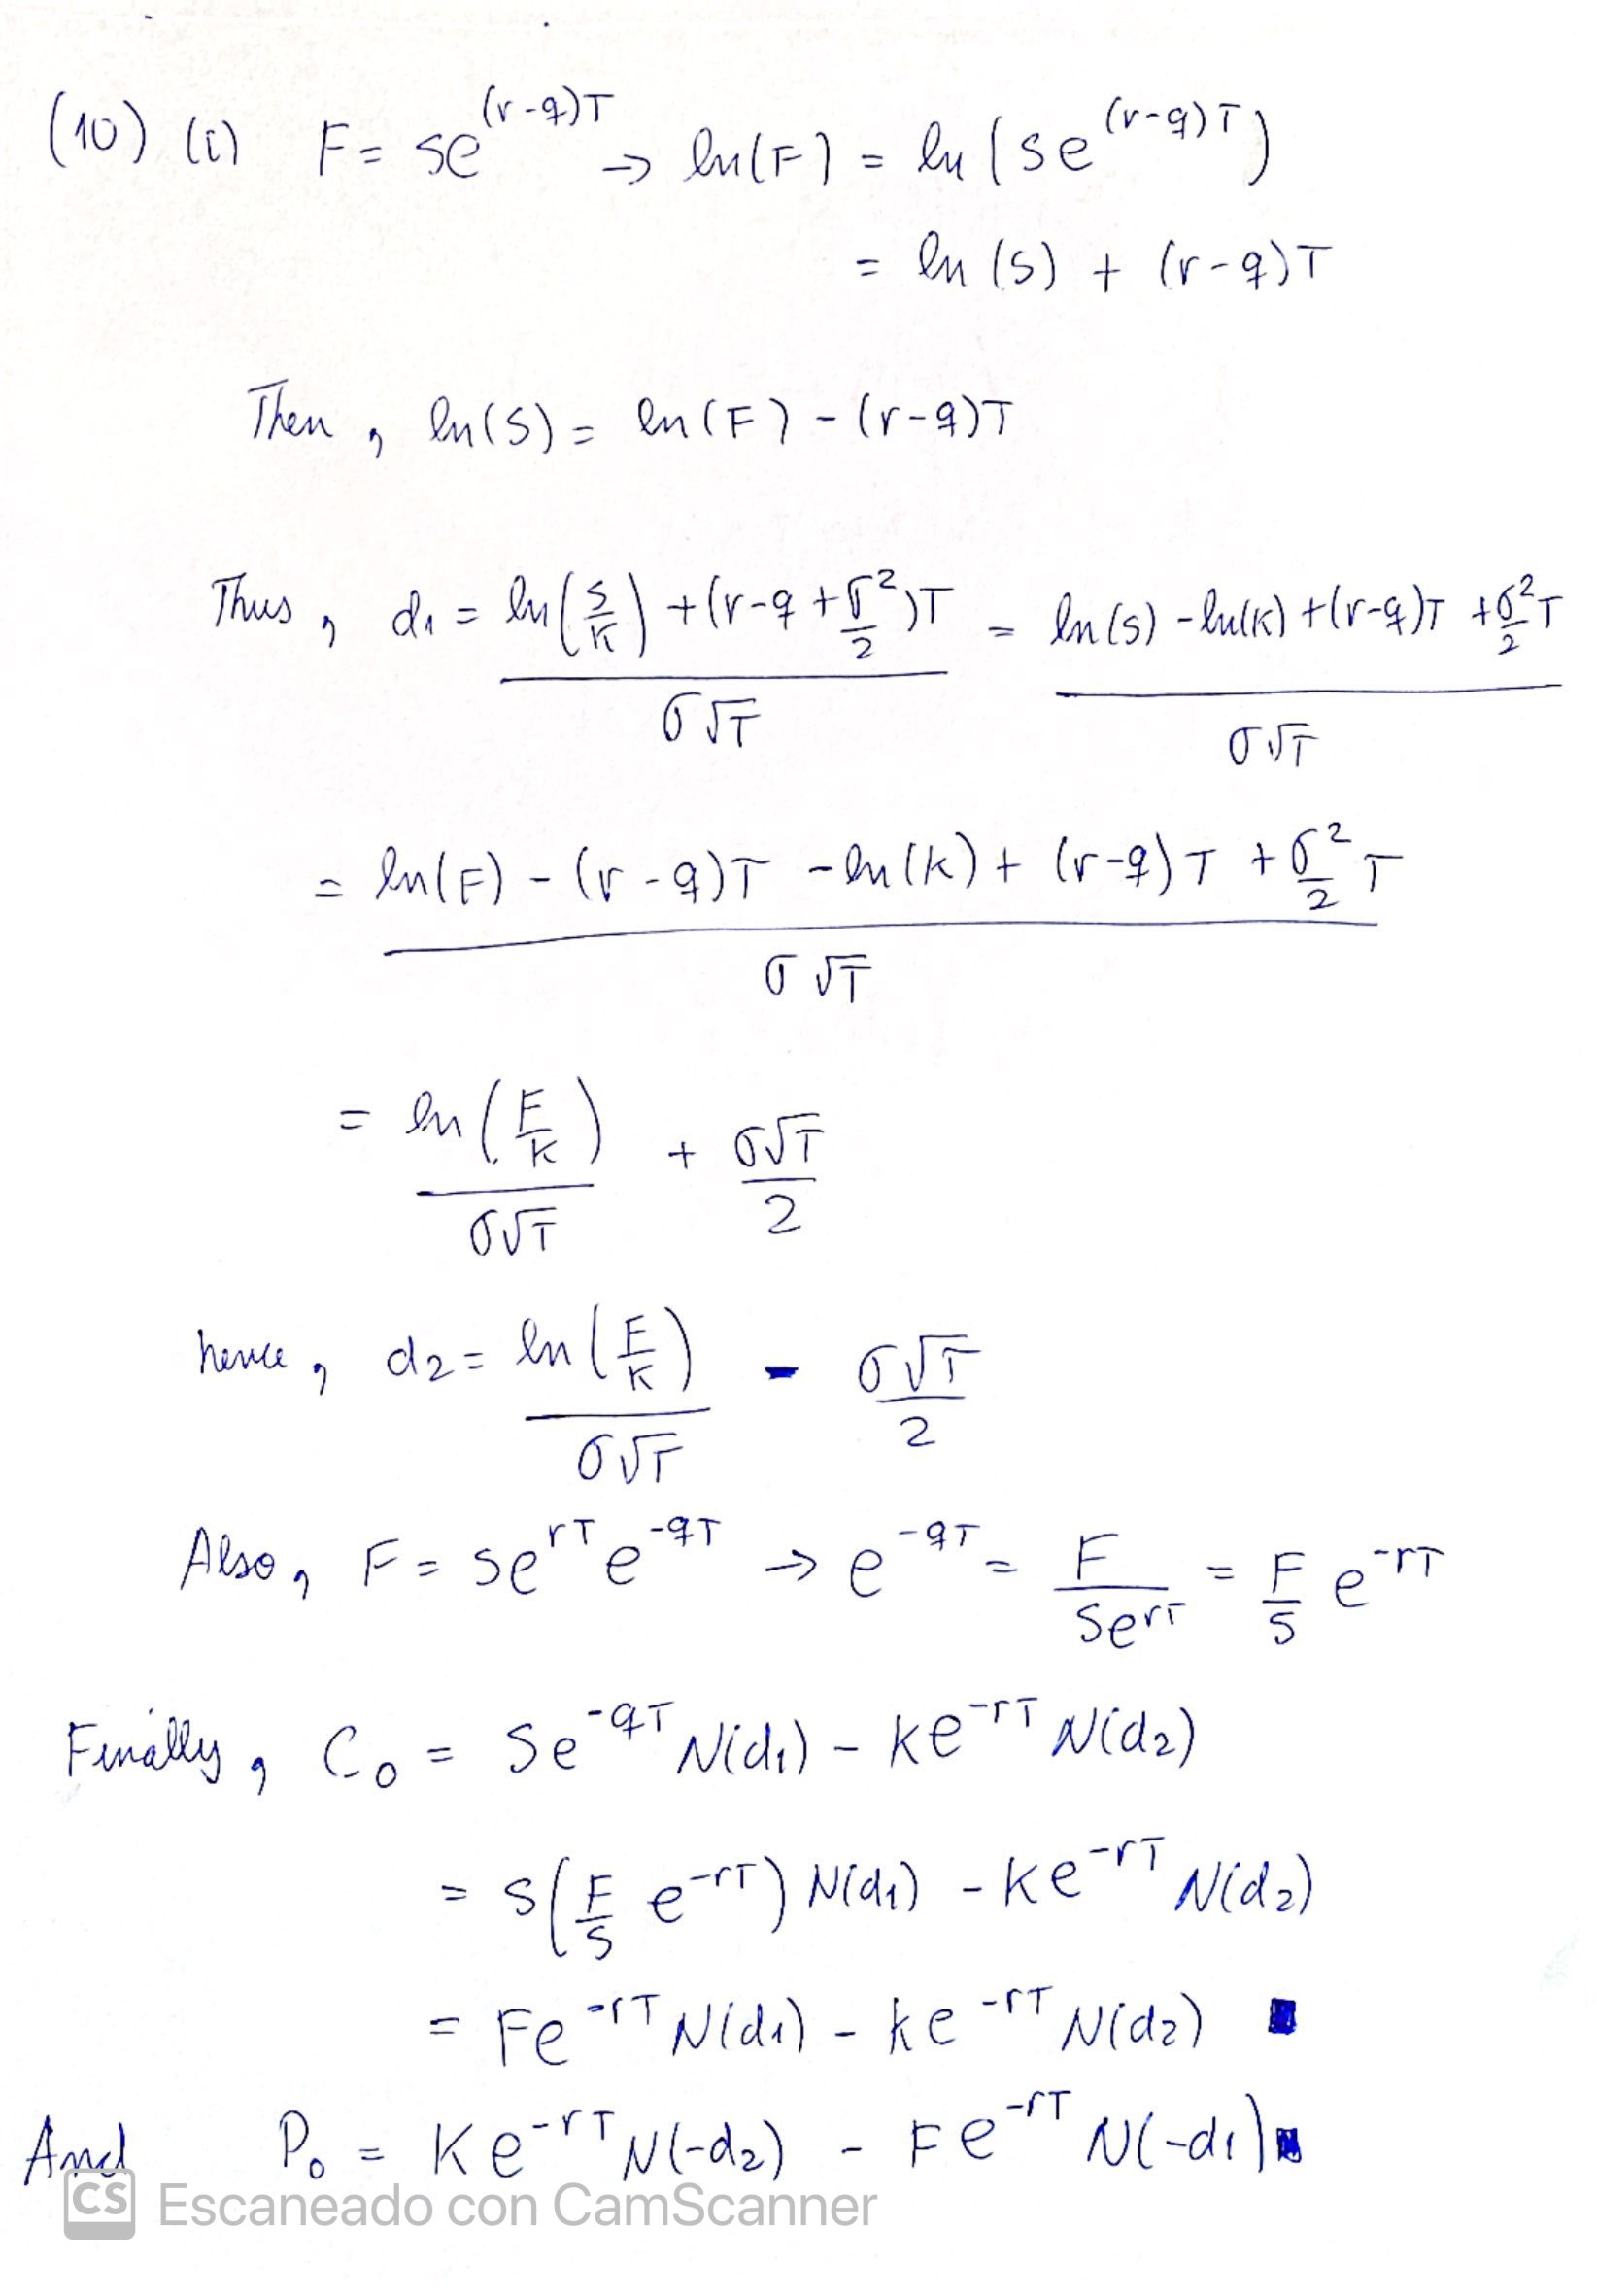

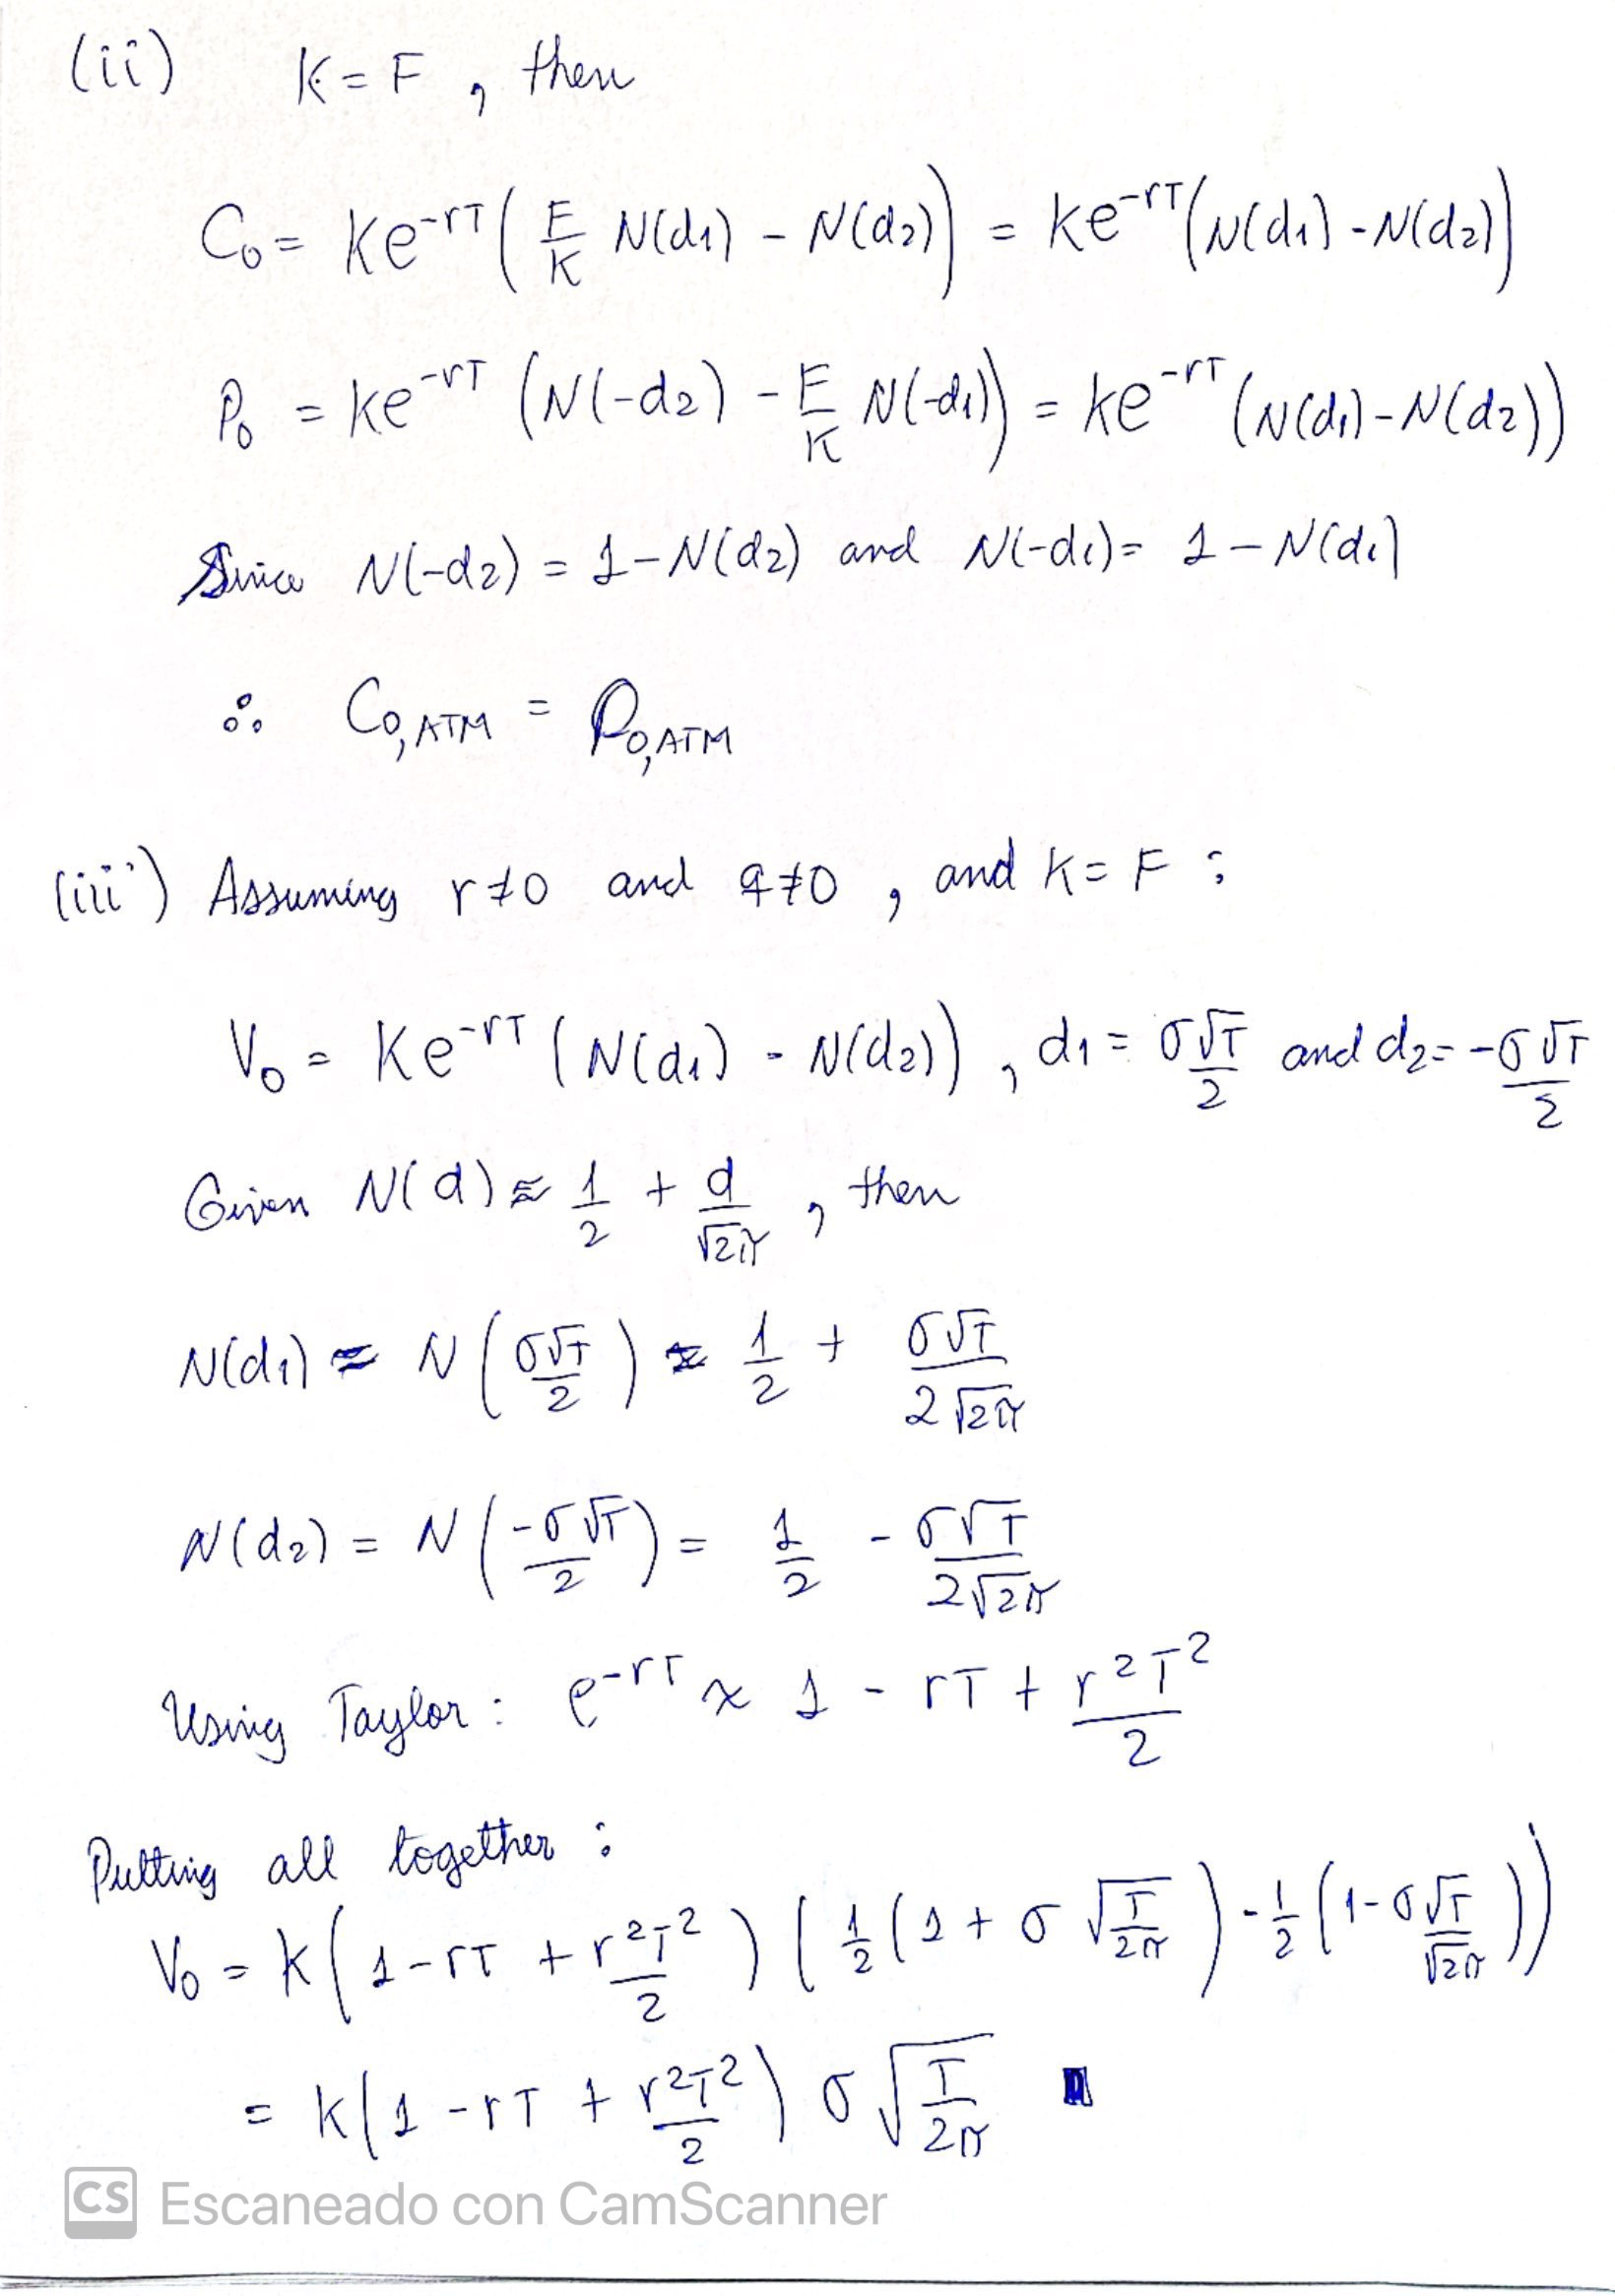

## Question 11

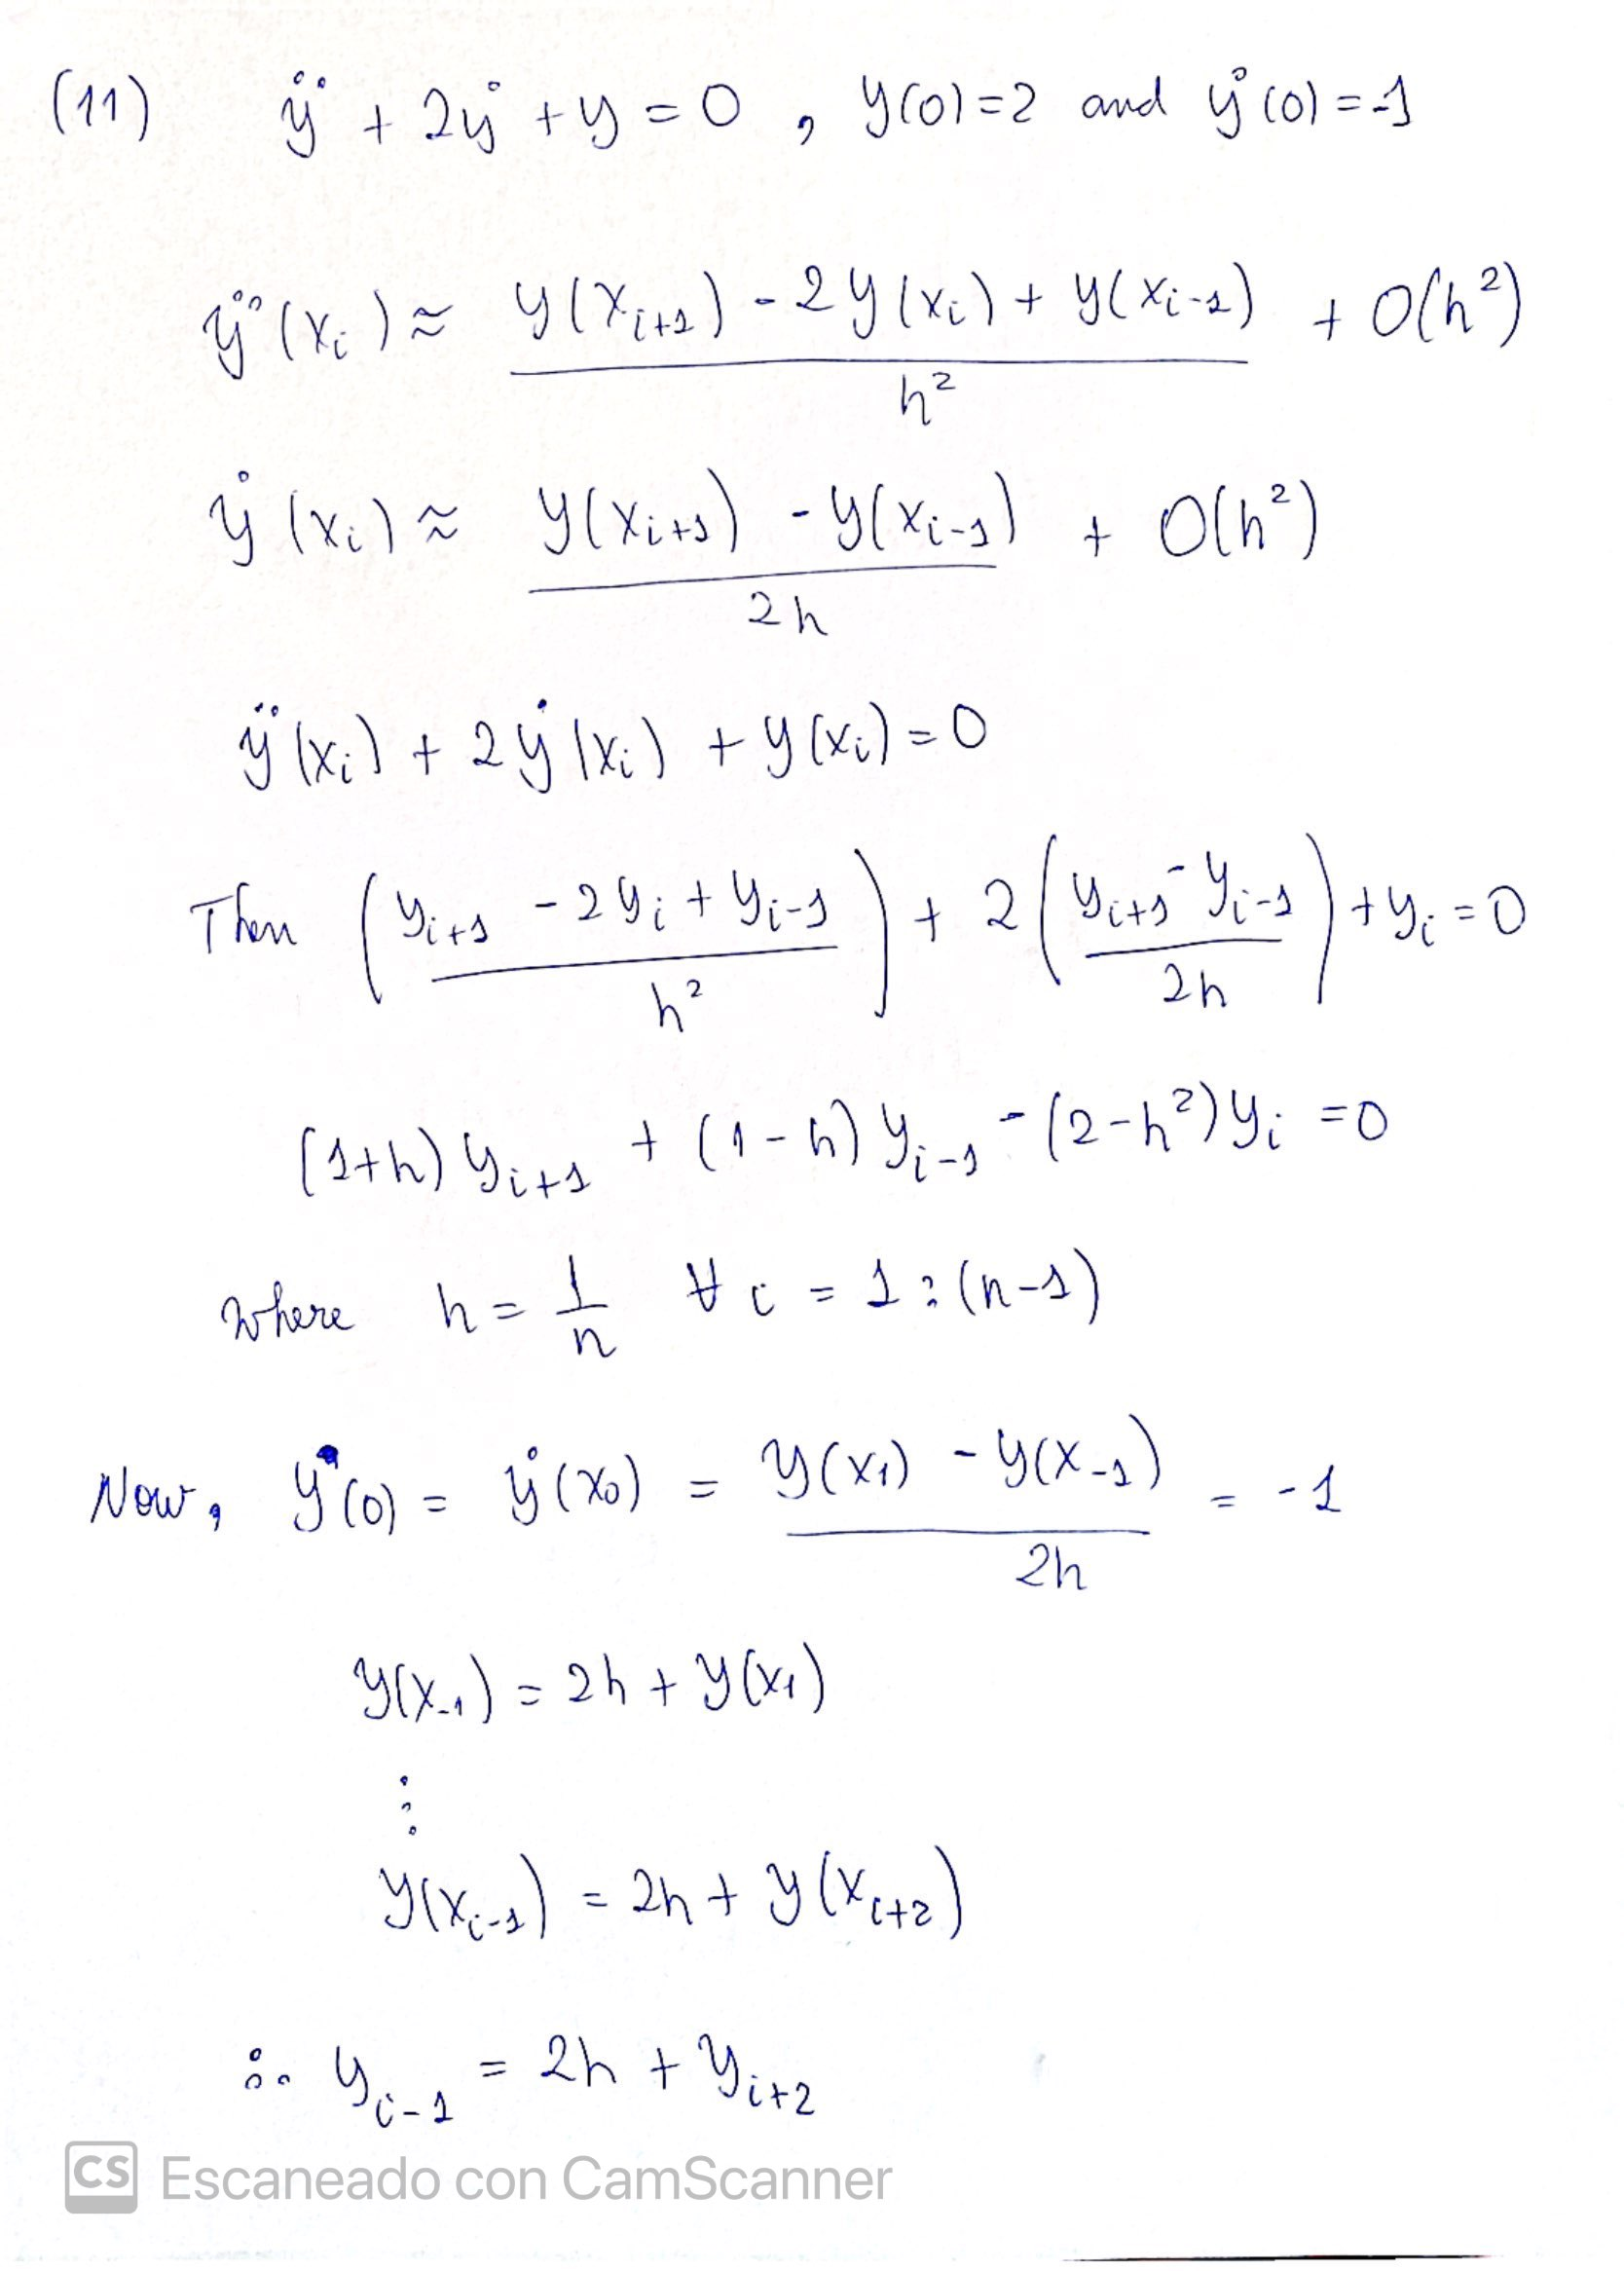

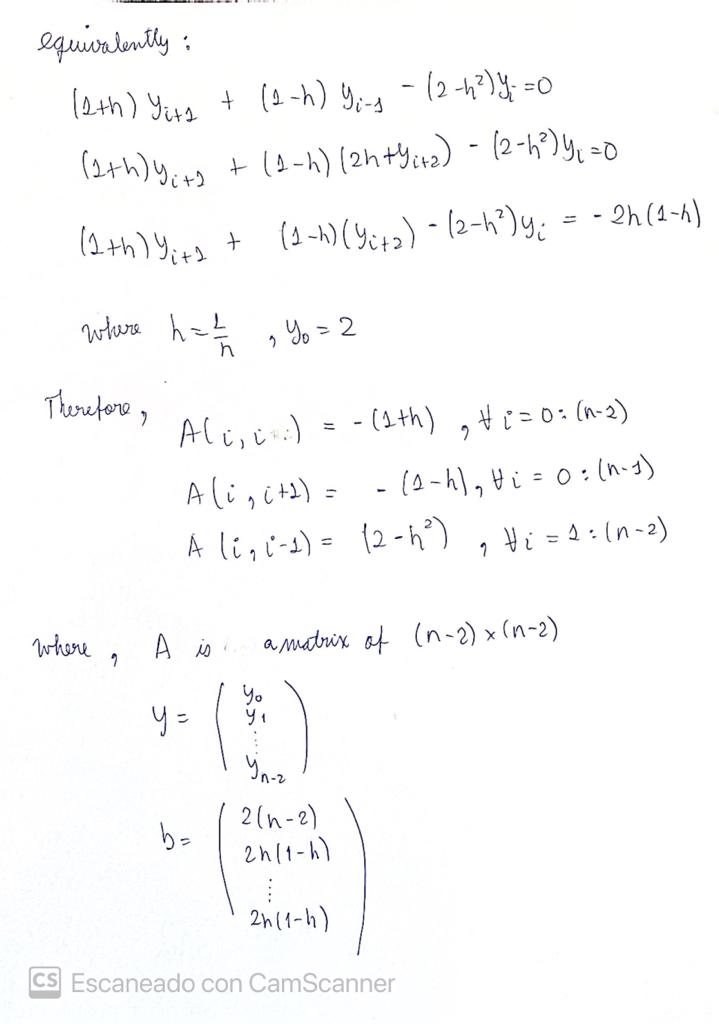

So, applying this result to what is asked:

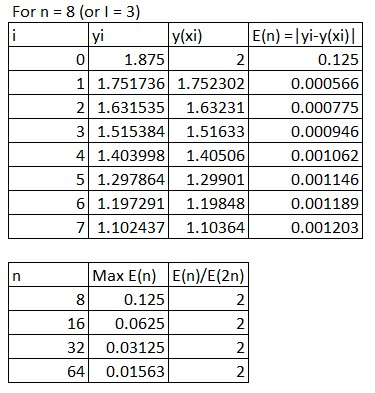

## Question 12

### Part(i)

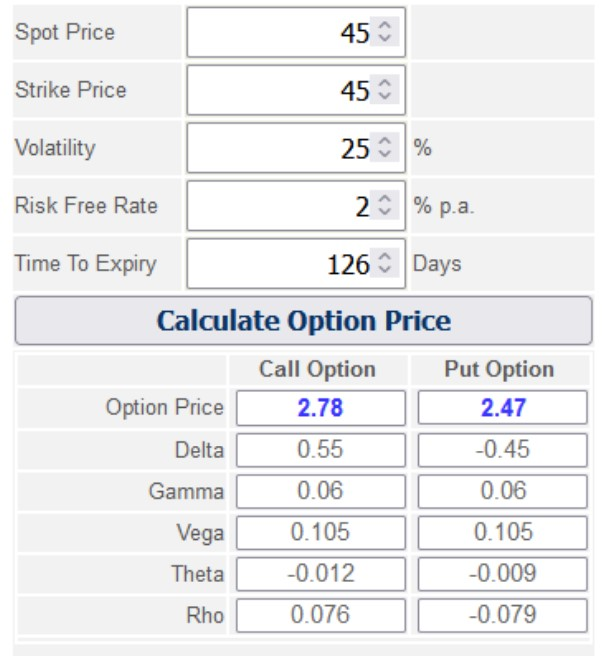

### Part(ii)

### dS = $1/10$
According to the online pricer:

In [15]:

print(f"1m Δc:", (2.43 - 2.52)/(2*(10**-1)))
print(f"1m Γc:", (2.43 - (2*2.47) + 2.52)/((10**-1)**2) )

1m Δc: -0.4499999999999993
1m Γc: 0.9999999999999785


According to our own BSE pricer for European options, we get:

In [16]:
VSeuropean = ComputeOptionBSE(S = 45, sigma = 0.25, r = 0.02, q=0).PutOption(
 deltaT = 126/252, K=45, cdf_method='stefanica'
)
print("BS European Price: ", VSeuropean)

BS European Price:  2.9348269567475924


### dS = $1/100$

In [17]:
VMinusdSeuropeand2 = ComputeOptionBSE(S = 45-(10**-2), sigma = 0.25, r = 0.02, q=0).PutOption(
 deltaT = 126/252, K=45, cdf_method='stefanica'
)
VPlusdSeuropeand2 = ComputeOptionBSE(S = 45+(10**-2), sigma = 0.25, r = 0.02, q=0).PutOption(
 deltaT = 126/252, K=45, cdf_method='stefanica'
)

print(f"1m Δc:", (VPlusdSeuropeand2 - VMinusdSeuropeand2)/(2*(10**-2)))
print(f"1m Γc:", (VPlusdSeuropeand2 - (2*VSeuropean) + VMinusdSeuropeand2)/((10**-2)**2))


1m Δc: -0.4423830450010158
1m Γc: 0.04959761110256977


### dS = $1/1000$

In [18]:
VMinusdSeuropeand3 = ComputeOptionBSE(S = 45-(10**-3), sigma = 0.25, r = 0.02, q=0).PutOption(
 deltaT = 126/252, K=45, cdf_method='stefanica'
)
VPlusdSeuropeand3 = ComputeOptionBSE(S = 45+(10**-3), sigma = 0.25, r = 0.02, q=0).PutOption(
 deltaT = 126/252, K=45, cdf_method='stefanica'
)

In [19]:
print(f"1m Δc:", (VPlusdSeuropeand3 - VMinusdSeuropeand3)/(2*(10**-3)))
print(f"1m Γc:", (VPlusdSeuropeand3 - (2*VSeuropean) + VMinusdSeuropeand3)/((10**-3)**2))

1m Δc: -0.44238301135735014
1m Γc: 0.049597623785757605


## Question 13

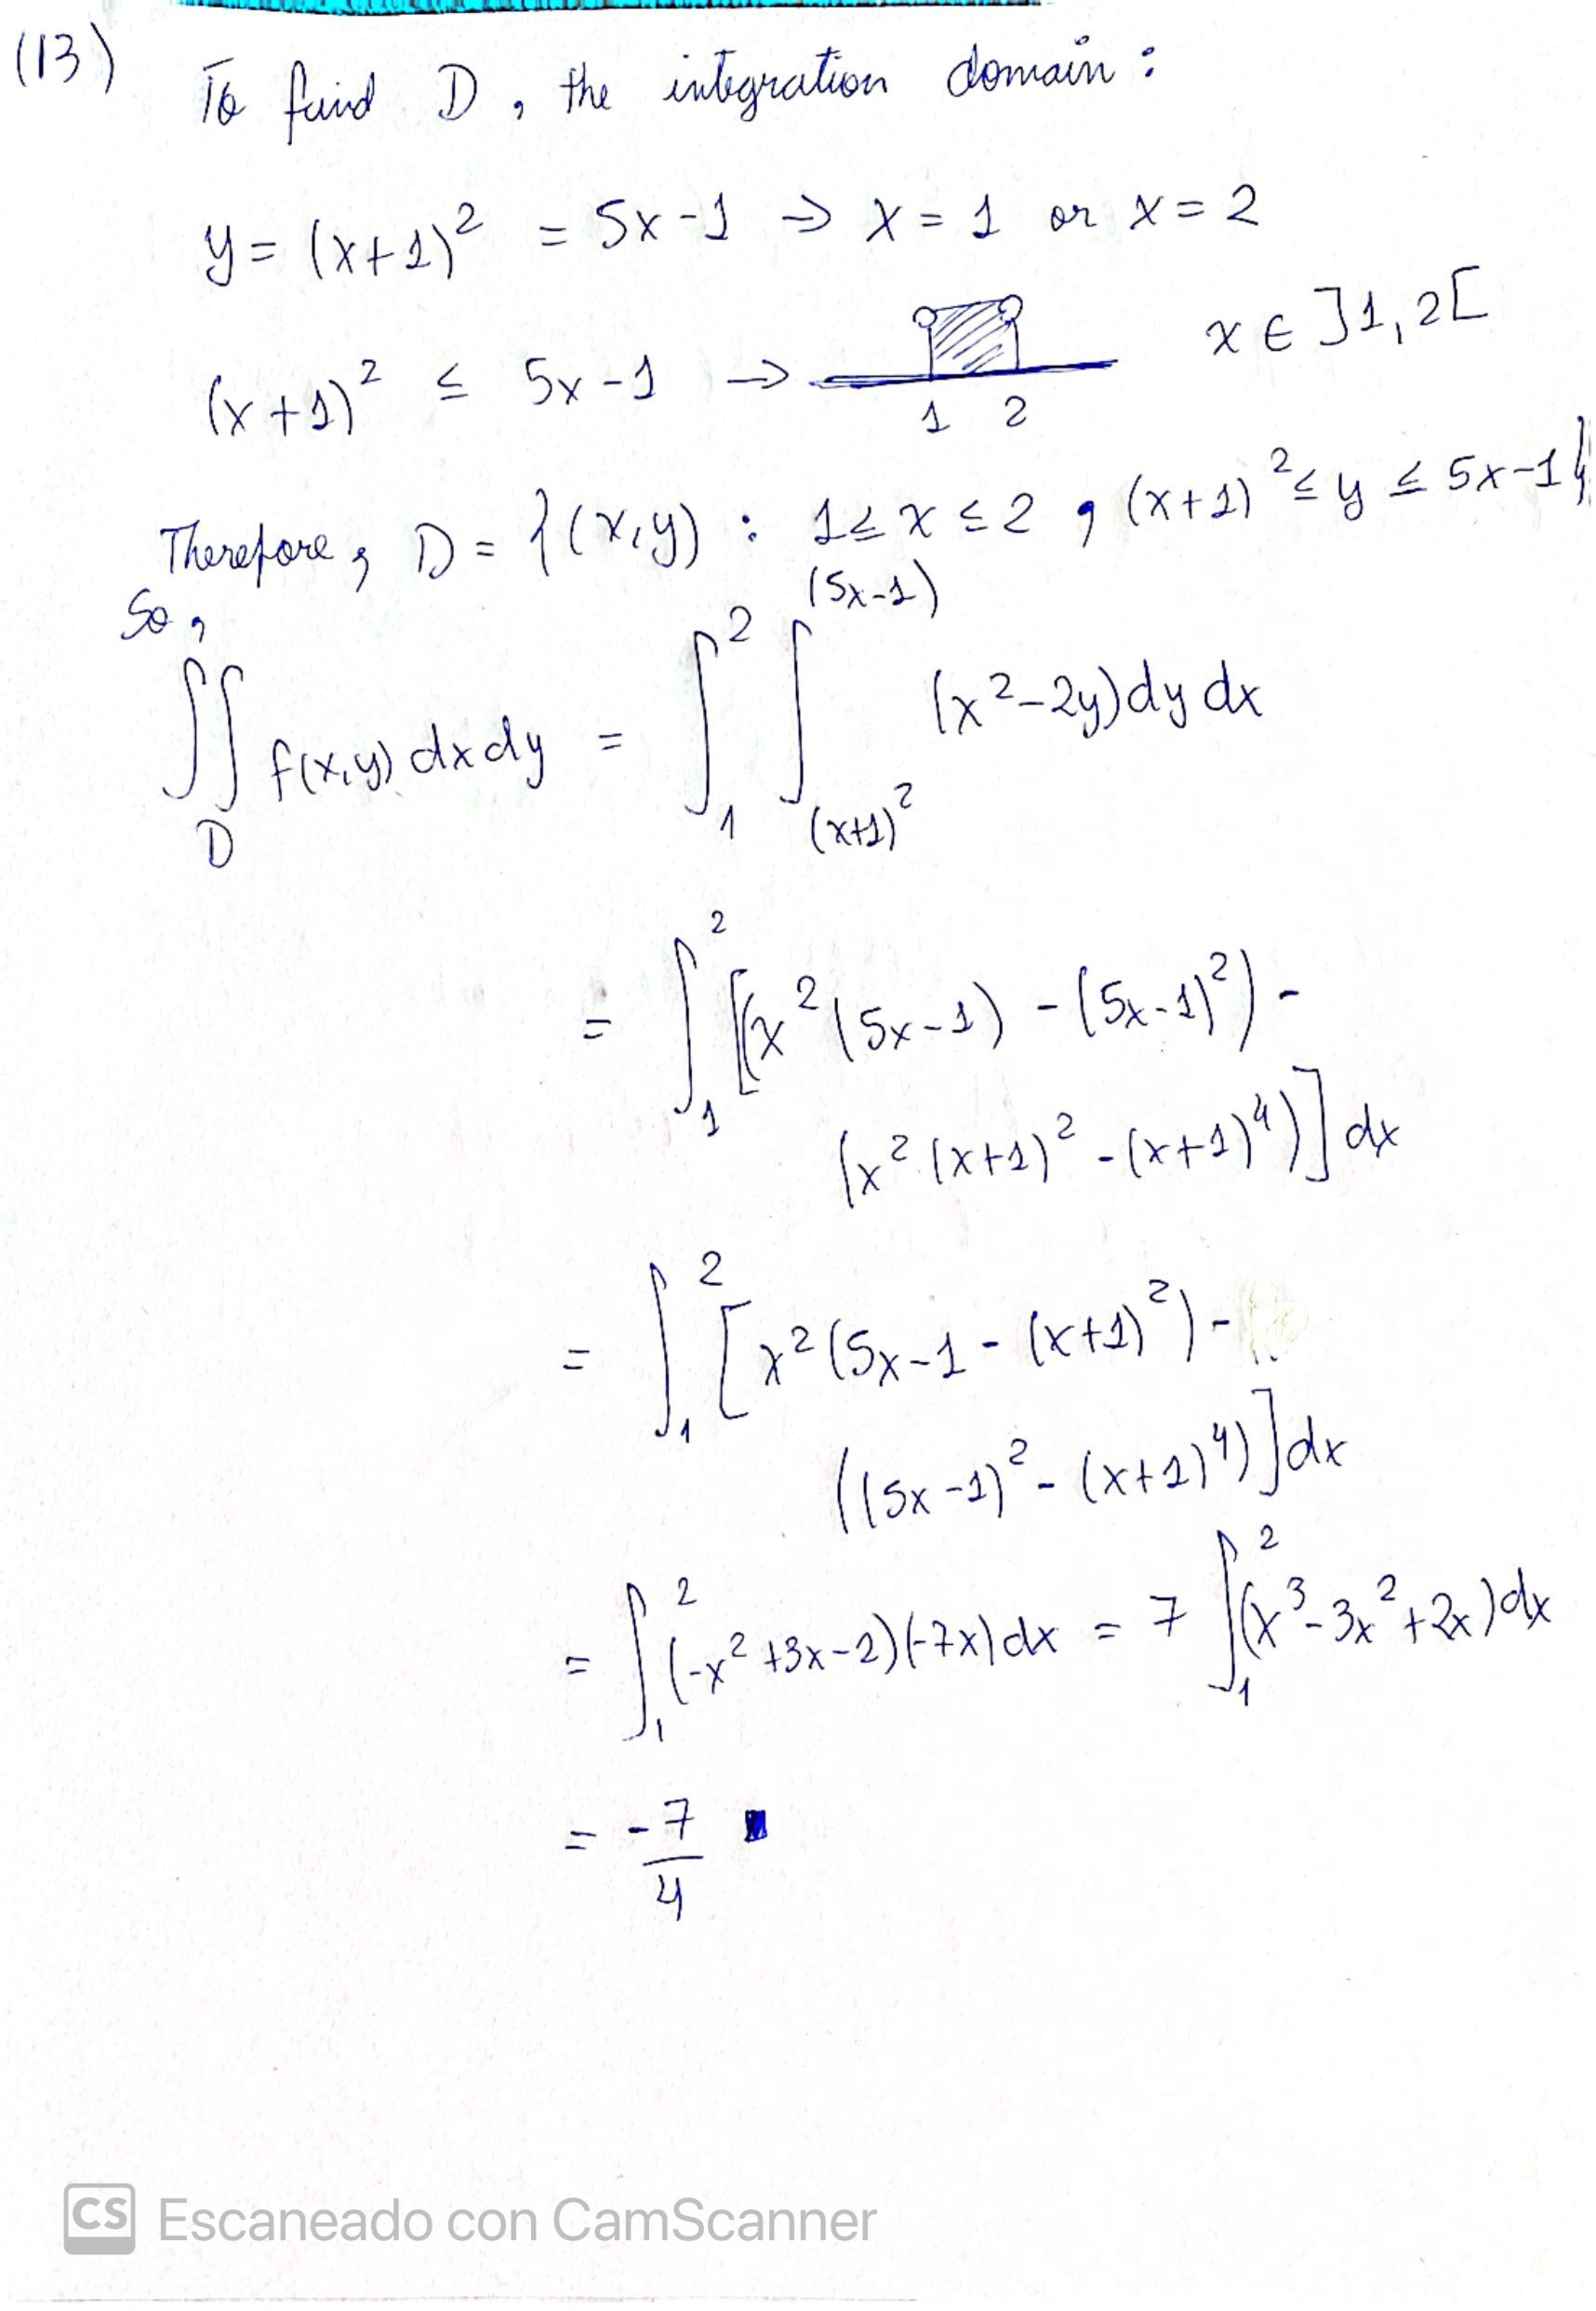

## Question 14

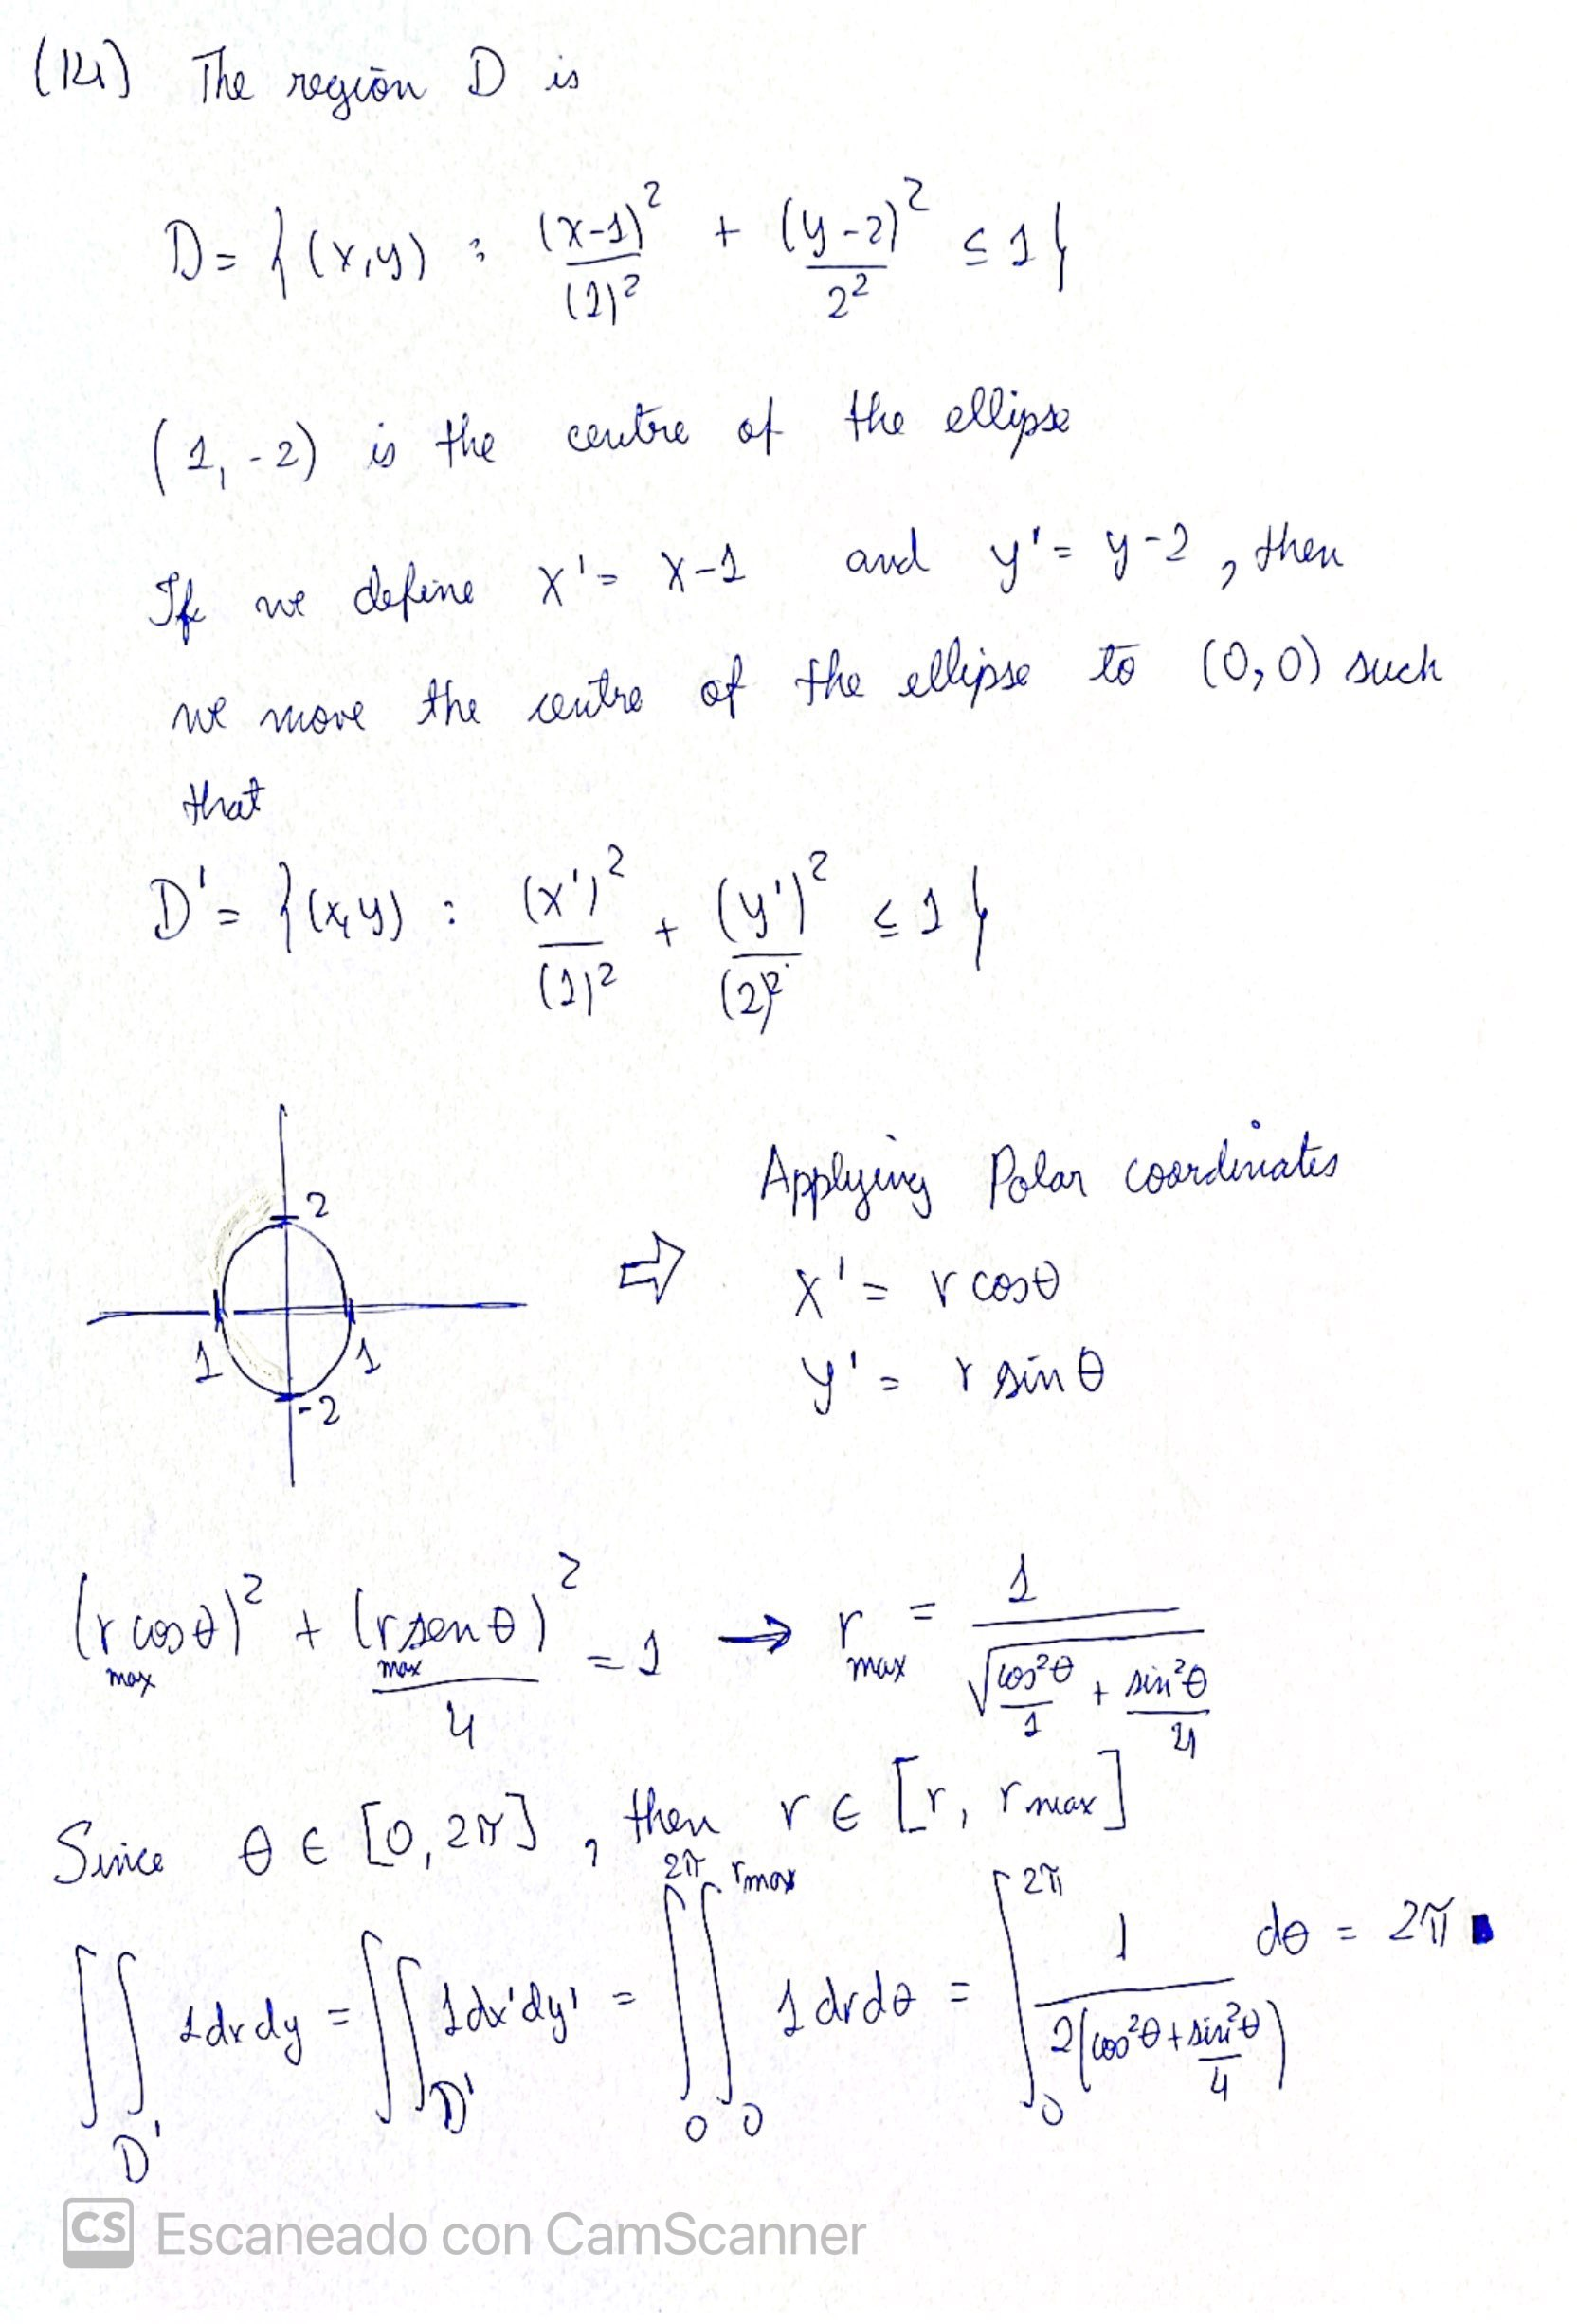